# ANALYSE D'INDICATEURS SUR LA VIE SCOLAIRE ET EXTRA-SCOLAIRE DES ÉLÈVES DE L'INSA TOULOUSE

### I. Objectif

Avec pour objectif d'aider tous les étudiants admis à obtenir leur diplôme quelle que soit leur origine sociale ou géographique, ou leur parcours scolaire avant d'entrer à l'INSA. Nous souhaitons donc pouvoir connaître les facteurs qui peuvent affecter la capacité de réussitte des étudiants afin de pouvoir trouver des solutions pour améliorer le taux de réussite des étudiants de l'INSA Toulouse.

    Modélisation du problème :
    Tout d'abord, dans le but que tous les étudiants obtiennent leur diplôme, nous allons étudier la variable REDOUBLEMENT par d'autres variables (facteurs affectant les étudiants). Pour les étudiants encore à l'école, cette variable décrit le mieux la probabilité de finir leurs études ou non. Nous voulons identifier les facteurs influençant le redoublement afin de limiter ce phénomène et d'améliorer le taux d'étudiants obtenant leur diplôme ou le faisant dans les délais impartis.
    De plus, nous pouvons étudier la variable RATTRAPAGES pour trouver des moyens de limiter les examens de rattrapage ou utiliser la variable CLASSEMENTDERNIER pour examiner quels facteurs aident les étudiants à obtenir de meilleurs résultats. 
    
    
**Cependant**, le problème se pose pour la variable CLASSEMENTDERNIER où environ un tiers choisissent "Je ne sais pas", ce qui complique le traitement car nous manquons d'informations et, si nous supprimons ces réponses, nous perdons un grand nombre d'observations. De plus, il est très difficile d'obtenir des informations pour les étudiants de première année ou les nouveaux entrants car lors de cette enquête, nous étions au deuxième semestre de l'année scolaire, ce qui signifie qu'ils n'ont passé qu'un semestre. Par conséquent, ils n'ont pas de résultats pour REDOUBLEMENT ou CLASSEMENTDERNIER, et la variable RATTRAPAGES, qui représente la moyenne du nombre de redoublements pendant toute la durée des études, est basée sur un échantillon trop petit. Je pense qu'il serait peut-être possible de séparer ces étudiants dans un jeu de données distinct, et nous analyserions alors les facteurs influençant leur capacité à s'adapter et à s'intégrer aux études à l'INSA Toulouse.
    

## II. Préparer les données.

### II.1. Découvrir des données 
Nous avons les données collectées d'une enquête réalisée par des étudiants de l'INSA Toulouse en mai 2024, effectuée via l'application Limesurvey. Ensuite, nous avons un fichier Excel contenant des lignes représentant chaque étudiant et des colonnes correspondant aux réponses. De plus, nous avons un fichier PDF 'Statistiques rapides' décrivant la distribution des réponses pour chaque question, ce qui nous aide à obtenir une vision plus détaillée des questions et des données que nous avons.

### II.2. Transformer des données 

Comme la plupart des questions sont à choix multiples, la réponse à une question ne se trouve pas dans une colonne mais dans plusieurs colonnes. Nous devons donc convertir ces colonnes en une seule colonne.

À cette étape, je me suis basé sur les résultats du fichier Excel des trois membres de l'équipe qui ont travaillé sur le projet précédent. Nous utilisons une formule conditionnelle dans Excel ; si la valeur de la colonne est "oui", elle renverra le résultat correspondant à la valeur de cette colonne. Cependant, après vérification, j'ai constaté qu'ils n'ont pas pris en compte les données de certaines questions, comme COMMENTAIRE, COURSNOTES(TD), COURSNOTES(TP), CONCENTRATIONPERSO, LOISIRSIMPACT, PREPMETIER, DOUBLEDIPLOME. Ils ont expliqué que cela était dû au fait qu'ils estimaient que ces variables pouvaient avoir une forte corrélation avec une autre variable, ou que ces variables avaient un taux élevé de valeurs non affichées, ou que tous les résultats se concentraient sur une seule valeur, etc. Mais je pense que cela n'est qu'une partie de leur ressenti, car ils n'ont pas utilisé de méthodes théoriques pour vérifier. Je souhaite donc utiliser tous les résultats des questions du sondage, vérifier le taux de données manquantes ou la corrélation des variables, puis les traiter ensuite.


En outre, pour les questions avec des valeurs de choix "Autre", où les répondants devaient entrer leur propre réponse, comme pour LOGEMENTTYPE, nous avons remarqué qu'il n'y avait pas beaucoup de valeurs "Autre". Nous avons donc regroupé manuellement ces valeurs "Autre" en catégories existantes. Par exemple, "concubinage", "avec ma copine", "en couple", "avec mon frère", "chez un ami" ont été regroupés sous "colocation", et "CROUS", "Logement étudiant", "maison individuelle" ont été regroupés sous "seul".

De plus, pour la variable DOUBLEDIPLOME, je recode les réponses choisies "Autre" en "Oui" ou "Non". Pour les cas indiquant une demande en cours, un souhait d'étudier ou une intention d'étudier l'année prochaine, je les recode en "Non". Selon moi, notre étude se base sur la variable RATTRAPPAGES, la moyenne du nombre de redoublements des semestres déjà étudiés. Par conséquent, si la double diplomation est envisagée dans le futur, cela n'a pas encore d'impact sur la variable cible.

Voici les résultats obtenus après le traitement des données sur Excel. Le fichier comprend 60 colonnes correspondant à 60 variables (sans compter la colonne ID) et 1182 lignes correspondant aux réponses de 1182 étudiants.


In [107]:
library(readxl) #Pour lire le fichier Excel
library(dplyr) #Pour convertir les variables de type 'chr' en type 'factor'
library(ggplot2) #Pour créer des graphiques
library(rlang) #Pour l'évaluation tidyeval
library(gridExtra) # Pour arranger plusieurs graphiques dans une grille
library(ggcorrplot) #Pour visualiser la matrice de corrélation.
library(reshape2) #Pour manipuler les données
library(writexl)
library(randomForest)
library(caret)  # For cross-validation
library(forcats)

In [108]:
# Lire le fichier Excel "results-survey278778.xlsx" qui se trouve dans le même répertoire que le script R
insa <- read_excel("survey_Luan.xlsx")
# Sélectionner les 60 variables
insa <- insa[, 2:61]


In [109]:
# Afficher la taille du dataframe
print(dim(insa))

[1] 1182   60


In [110]:
# Afficher les premières lignes du dataframe
print(str(insa))

tibble [1,182 × 60] (S3: tbl_df/tbl/data.frame)
 $ TRAJET            : chr [1:1182] "15-30min" "5-15min" "0-5min" "5-15min" ...
 $ LOGEMENTTYPE      : chr [1:1182] "seul" "seul" "seul" "seul" ...
 $ LOGEMENTSURFACE   : chr [1:1182] "+ 30m2" "+ 30m2" "10-20m2" "+ 30m2" ...
 $ LOGEMENTBIEN      : chr [1:1182] "tout à fait" "tout à fait" "plutôt oui" "tout à fait" ...
 $ ACT_PRO           : chr [1:1182] "aucune" "aucune" "aucune" "aucune" ...
 $ BOURSIER          : chr [1:1182] "echelon 1-3" "non" "non" "non" ...
 $ HANDICAP          : chr [1:1182] "non" "non" "non" "non" ...
 $ TIERSTEMPS        : chr [1:1182] "Non" "Non" "Non" "Non" ...
 $ STRESS            : chr [1:1182] "souvent" "souvent" "souvent" "toujours" ...
 $ COMMENTAIRE       : chr [1:1182] "jamais" "parfois" "parfois" "parfois" ...
 $ COMCONSTRUCTIFS   : chr [1:1182] "pas commentaire" "plutôt oui" "plutôt oui" "plutôt oui" ...
 $ ETUDE_SEM         : chr [1:1182] "0-1h" "+4h" "1-2h" "1-2h" ...
 $ ETUDEWE           : chr [1:11

    Nous constatons que les valeurs des variables sont encodées sous forme de chr[] alors que nos données devraient être encodées sous forme de facteurs pour les variables qualitatives. Par conséquent, nous allons convertir toutes les variables en facteurs.

In [111]:
# Convertir toutes les colonnes de type 'chr' en 'factor' avec dplyr
insa <- insa %>%
  mutate_if(is.character, as.factor)
# Afficher la structure du dataframe après convertir
print(str(insa))

tibble [1,182 × 60] (S3: tbl_df/tbl/data.frame)
 $ TRAJET            : Factor w/ 4 levels "+30min","0-5min",..: 3 4 2 4 4 4 3 3 2 2 ...
 $ LOGEMENTTYPE      : Factor w/ 3 levels "colocation","foyer familial",..: 3 3 3 3 1 1 3 3 3 3 ...
 $ LOGEMENTSURFACE   : Factor w/ 5 levels "- 10m2","+ 30m2",..: 2 2 3 2 5 5 4 2 3 4 ...
 $ LOGEMENTBIEN      : Factor w/ 4 levels "pas du tout",..: 4 4 3 4 4 4 4 4 3 3 ...
 $ ACT_PRO           : Factor w/ 5 levels "aucune","oui +15h",..: 1 1 1 1 1 3 1 2 1 1 ...
 $ BOURSIER          : Factor w/ 4 levels "echelon 0bis",..: 2 4 4 4 4 4 4 4 1 4 ...
 $ HANDICAP          : Factor w/ 2 levels "non","oui": 1 1 1 1 1 1 1 1 1 2 ...
 $ TIERSTEMPS        : Factor w/ 2 levels "Non","Oui": 1 1 1 1 2 1 1 1 1 2 ...
 $ STRESS            : Factor w/ 4 levels "jamais","parfois",..: 3 3 3 4 3 4 4 3 3 3 ...
 $ COMMENTAIRE       : Factor w/ 4 levels "jamais","parfois",..: 1 2 2 2 2 2 2 2 2 3 ...
 $ COMCONSTRUCTIFS   : Factor w/ 5 levels "non","pas commentaire",..: 2 4 4 4 4 4

    Nous constatons que les variables ont été converties en facteurs, mais l'ordre des modalités est mélangé. Cela rend le suivi de chaque variable difficile et je trouve cela déroutant. Par conséquent, nous devons convertir la variable en facteur avec un ordre spécifique.

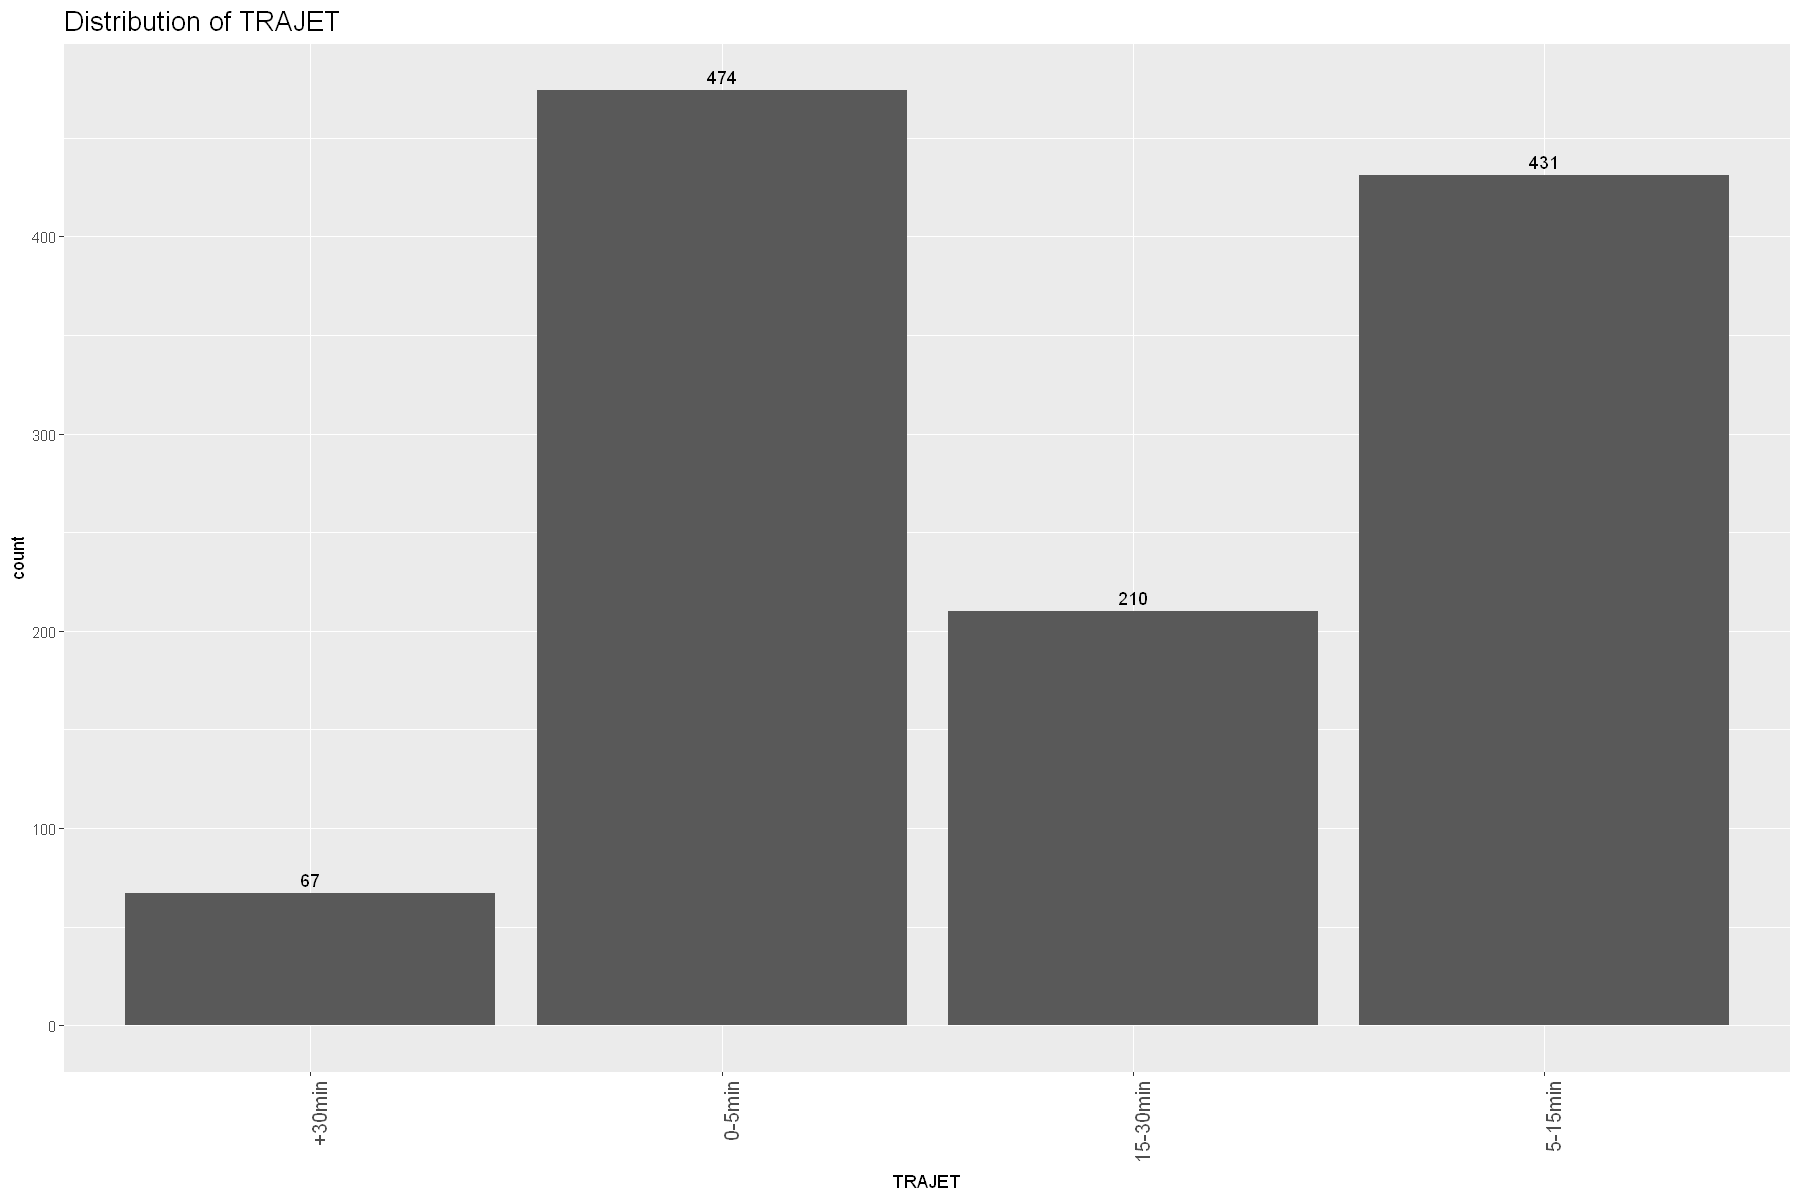

In [112]:
# Créer le graphique de distribution pour la variable TRAJET
p <- ggplot(insa, aes(x = TRAJET)) +
  geom_bar() +
  geom_text(stat='count', aes(label=after_stat(count)), vjust=-0.5) +
  ggtitle("Distribution of TRAJET") +
  theme(axis.text.x = element_text(angle = 90, hjust = 1, size = 12),
        plot.title = element_text(size = 16))

# Afficher le graphique
print(p)

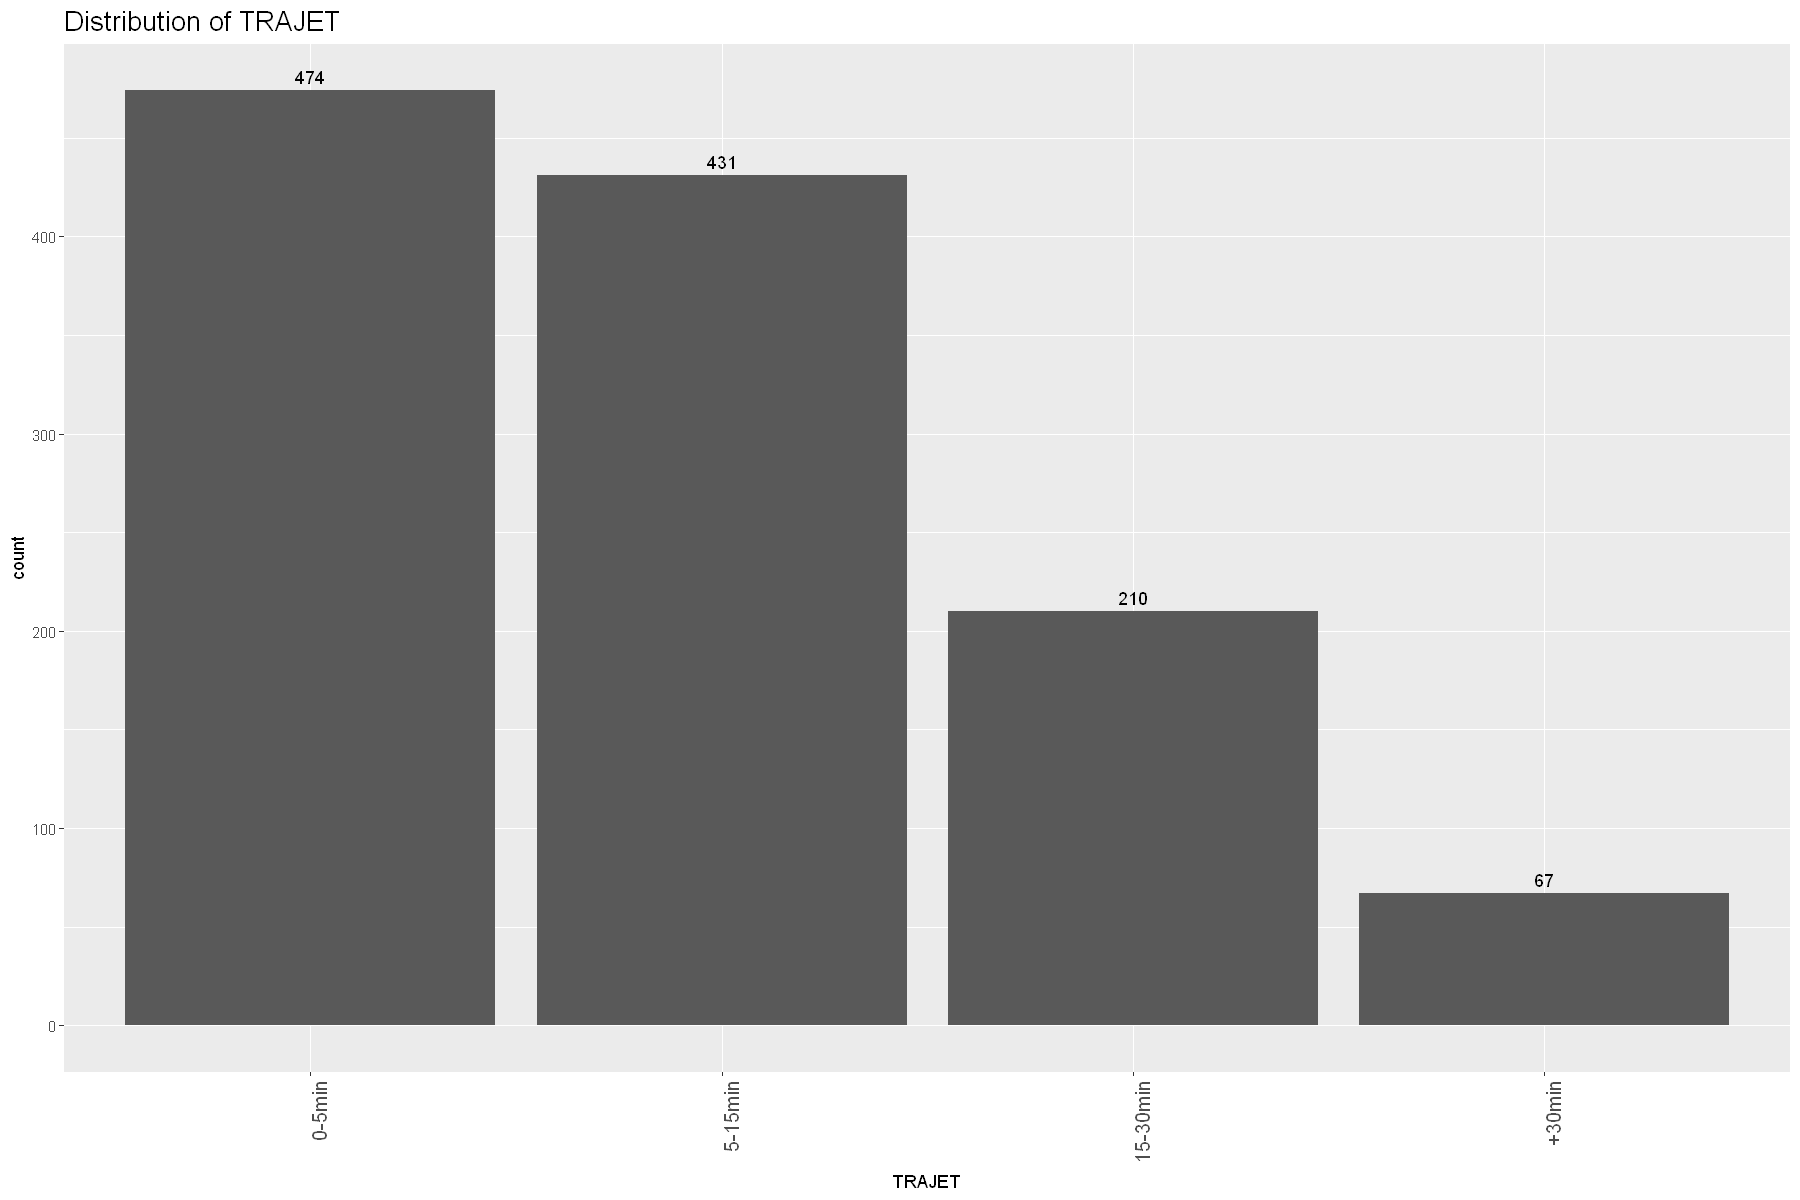

In [113]:
# Convertir la variable en facteur avec un ordre spécifique
insa$TRAJET <- factor(insa$TRAJET, levels = c("0-5min", "5-15min", "15-30min", "+30min"))

# Créer le graphique de distribution pour la variable TRAJET
p <- ggplot(insa, aes(x = TRAJET)) +
  geom_bar() +
  geom_text(stat='count', aes(label=after_stat(count)), vjust=-0.5) +
  ggtitle("Distribution of TRAJET") +
  theme(axis.text.x = element_text(angle = 90, hjust = 1, size = 12),
        plot.title = element_text(size = 16))

# Afficher le graphique
print(p)

    Nous procéderons de la même manière pour toutes les variables.

In [114]:
levels_list <- list(
  TRAJET = c("0-5min", "5-15min", "15-30min", "+30min"),
  LOGEMENTTYPE = c("seul", "colocation", "foyer familial"),
  LOGEMENTSURFACE = c("- 10m2", "10-20m2", "20-30m2", "+ 30m2","coloc ou foyer familial"),
  LOGEMENTBIEN = c("pas du tout", "plutôt non", "plutôt oui", "tout à fait"),
  ACT_PRO = c("aucune", "oui 1-5h", "oui 5-10h","oui 10-15h", "oui +15h"),
  BOURSIER = c("non","echelon 0bis", "echelon 1-3", "echelon 4-7"),
  HANDICAP = c("non", "oui"),
  TIERSTEMPS = c("Non", "Oui"),
  STRESS = c("jamais", "parfois", "souvent", "toujours"),
  COMMENTAIRE = c("jamais", "parfois", "souvent", "toujours"),
  COMCONSTRUCTIFS = c("pas commentaire","non", "plutôt non", "plutôt oui", "tout à fait"),
  ETUDE_SEM = c("0h", "0-1h", "1-2h", "2-4h", "+4h"),
  ETUDEWE = c("0h","0-1h","1-2h", "2-4h", "4-6h", "6-8h", "+8h"),
  ETUDEGROUPE = c("jamais", "parfois", "souvent", "toujours"),
  ETUDEDEHORS = c("jamais", "parfois", "souvent", "toujours"),
  ETUDEDOM = c("jamais", "parfois", "souvent", "toujours"),
  PRESENCE_CM = c("Jamais", "Parfois", "Souvent", "Toujours"),
  PRESENCE_TD = c("Jamais", "Parfois", "Souvent", "Toujours"),
  PRESENCE_TP = c("Jamais", "Parfois", "Souvent", "Toujours"),
  CONCENTRATION_CM = c("Très peu concentré.e", "Moyennement concentré.e", "Assez bien concentré.e", "Totalement concentré.e"),
  CONCENTRATION_TD = c("Très peu concentré.e", "Moyennement concentré.e", "Assez bien concentré.e", "Totalement concentré.e"),
  CONCENTRATION_TP = c("Très peu concentré.e", "Moyennement concentré.e", "Assez bien concentré.e", "Totalement concentré.e"),
  PREPCOURS_CM = c("Jamais", "Parfois", "Souvent", "Toujours"),
  PREPCOURS_TD = c("Jamais", "Parfois", "Souvent", "Toujours"),
  PREPCOURS_TP = c("Jamais", "Parfois", "Souvent", "Toujours"),
  COURSNOTES_CM = c("Jamais", "Parfois", "Souvent", "Toujours"),
  COURSNOTES_TD = c("Jamais", "Parfois", "Souvent", "Toujours"),
  COURSNOTES_TP = c("Jamais", "Parfois", "Souvent", "Toujours"),
  REVISIONSDEB = c("semestre", "1 mois avant", "2 semaines avant", "1 semaine avant", "3-4 jours avant", "la veille"),
  CONCENTRATIONPERSO = c("pas du tout", "moyennement", "plutôt oui", "très"),
  CONDITIONSTRAVAIL = c("mauvaises", "moyennes", "plutôt bonnes", "très bonnes"),
  RESSOURCES_SUP = c("jamais", "parfois", "régulièrement", "très souvent"),
  AMIS = c("jamais", "parfois", "régulièrement", "très souvent"),
  FAMILLE = c("jamais", "parfois", "régulièrement", "très souvent"),
  ISOLEMENT = c("jamais", "parfois", "souvent", "toujours"),
  ASSOCIATIF = c("non", "0-1h", "1-5h", "5-10h", "10-15h","15-20h", "+20h"),
  ASSOCIATIF_POSITIF = c("pas d'asso", "pas du tout", "plutôt non", "plutôt oui", "tout à fait"),
  ASSOCIATIFFATIGUE = c("pas d'asso", "pas du tout", "plutôt non", "plutôt oui", "tout à fait"),
  SPORTTEMPS = c("0-1h", "1-3h", "3-6h", "6-10h", "+10h"),
  SPECTACLES = c("jamais", "rarement", "1/mois", "1/semaine"),
  SPECTACLES_POSITIF = c("pas de spectacles", "pas du tout", "plutôt non", "plutôt oui", "tout à fait"),
  SORTIEBAR = c("jamais", "rarement", "1/mois", "1/semaine", "plusieurs fois/semaine", "tous les jours"),
  DETENTE = c("jamais", "parfois", "régulièrement", "très souvent"),
  ECRANS = c("0-1h", "1-2h", "2-4h", "4-6h", "6-8h","+8h"),
  SOMMEIL = c("très insatisfaisante", "plutôt insatisfaisante", "plutôt satisfaisante", "très satisfaisante"),
  ALIMENTATION = c("pas du tout", "plutôt non", "plutôt oui", "tout à fait"),
  MOTIVATION = c("pas du tout", "plutôt non", "plutôt oui", "tout à fait"),
  SENSATIONREUSSITE = c("pas du tout", "plutôt non", "plutôt oui", "tout à fait"),
  ADEQUATION = c("pas du tout", "plutôt non", "plutôt oui", "tout à fait"),
  PREPMETIER = c("pas du tout", "plutôt non", "plutôt oui", "tout à fait"),
  PROMO = c("1A", "2A", "3A", "4A", "5A"),
  SPECIALITE_PO = c("ICBE", "IMACS", "MIC", "IC", "GB", "GP3E", "GP", "AE", "GMM", "IR", "GC", "GM", "apprentissage", "1A"),
  COHORTE = c("FAS", "NORG", "IBER", "IBER_Fr", "ENG", "ENG_Fr", "AS_Hue", "AS_Fr", "SHN", "Danse-etude", "Musique-etude", "Theatre-etude", "SupENR", "classique"),
  DOUBLEDIPLOME = c("non", "oui"),
  INTEGRATION = c("post-bac", "1A", "2A", "3A", "4A", "5A"),
  BACTYPE = c("Fr", "Fr_etranger", "equi_Fr", "etranger"),
  CLASSEMENT1A = c("0-10%", "10-25%", "25-50%", "50-75%", "75-100%", "redoubl", "amenag", "pas de classement"),
  CLASSEMENTDERNIER = c("0-10%", "10-25%", "25-50%", "50-75%", "75-100%", "jsp"),
  REDOUBLEMENT = c("Non", "Oui"),
  RATTRAPAGES = c("aucun", "1 par semestre", "2/3 par semestre", "+ de 4 par semestre")
)
for (var in names(levels_list)) {
  if (var %in% names(insa)) {
    insa[[var]] <- factor(insa[[var]], levels = levels_list[[var]])
  }
}

str(insa)



tibble [1,182 × 60] (S3: tbl_df/tbl/data.frame)
 $ TRAJET            : Factor w/ 4 levels "0-5min","5-15min",..: 3 2 1 2 2 2 3 3 1 1 ...
 $ LOGEMENTTYPE      : Factor w/ 3 levels "seul","colocation",..: 1 1 1 1 2 2 1 1 1 1 ...
 $ LOGEMENTSURFACE   : Factor w/ 5 levels "- 10m2","10-20m2",..: 4 4 2 4 5 5 3 4 2 3 ...
 $ LOGEMENTBIEN      : Factor w/ 4 levels "pas du tout",..: 4 4 3 4 4 4 4 4 3 3 ...
 $ ACT_PRO           : Factor w/ 5 levels "aucune","oui 1-5h",..: 1 1 1 1 1 2 1 5 1 1 ...
 $ BOURSIER          : Factor w/ 4 levels "non","echelon 0bis",..: 3 1 1 1 1 1 1 1 2 1 ...
 $ HANDICAP          : Factor w/ 2 levels "non","oui": 1 1 1 1 1 1 1 1 1 2 ...
 $ TIERSTEMPS        : Factor w/ 2 levels "Non","Oui": 1 1 1 1 2 1 1 1 1 2 ...
 $ STRESS            : Factor w/ 4 levels "jamais","parfois",..: 3 3 3 4 3 4 4 3 3 3 ...
 $ COMMENTAIRE       : Factor w/ 4 levels "jamais","parfois",..: 1 2 2 2 2 2 2 2 2 3 ...
 $ COMCONSTRUCTIFS   : Factor w/ 5 levels "pas commentaire",..: 1 4 4 4 4 4 4 4 3 4

    Nous vérifions s'il y a des valeurs manquantes, ce qui peut nous aider à détecter des fautes d'orthographe lorsque nous réorganisons l'ordre des modalités. 

In [115]:
# Vérifier le nombre de valeurs NA dans chaque variable
na_counts <- sapply(insa, function(x) sum(is.na(x)))
print(na_counts)

            TRAJET       LOGEMENTTYPE    LOGEMENTSURFACE       LOGEMENTBIEN 
                 0                  1                  5                  0 
           ACT_PRO           BOURSIER           HANDICAP         TIERSTEMPS 
                 0                  0                  0                  0 
            STRESS        COMMENTAIRE    COMCONSTRUCTIFS          ETUDE_SEM 
                 0                  0                  0                  0 
           ETUDEWE        ETUDEGROUPE        ETUDEDEHORS           ETUDEDOM 
                 0                  0                  0                  0 
       PRESENCE_CM        PRESENCE_TD        PRESENCE_TP   CONCENTRATION_CM 
                 0                  0                  0                  0 
  CONCENTRATION_TD   CONCENTRATION_TP       PREPCOURS_CM       PREPCOURS_TD 
                 0                  0                  0                  0 
      PREPCOURS_TP      COURSNOTES_CM      COURSNOTES_TD      COURSNOTES_TP 

    En outre, nous constatons qu'il y a des valeurs manquantes pour deux variables, LOGEMENTTYPE et LOGEMENTSURFACE. Pour la variable LOGEMENTTYPE, il y a une option 'Autre' et un étudiant a rempli 'vélo', que nous considérons comme une valeur manquante. De plus, nous avons divisé les résultats de la variable LOGEMENTTYPE en valeurs disponibles, parmi lesquelles 5 valeurs sont classées sous 'seul'. Cependant, lorsque l'option 'Autre' est choisie, il n'y a pas de question sur LOGEMENTSURFACE. Par conséquent, les 5 personnes qui ont choisi 'Autre' de type 'seul' n'ont pas de valeur pour LOGEMENTSURFACE.

    Comme le nombre de valeurs manquantes est faible, nous allons supprimer les individus contenant des valeurs manquantes (nous pourrions utiliser des méthodes telles que calculer la moyenne ou la Random Forest pour imputer la valeur de LOGEMENTSURFACE, mais avec 5 données manquantes sur 1182 (soit 0,423%), nous pouvons les supprimer).

In [116]:
# Supprimer les lignes contenant des valeurs manquantes
insa_cleaned_1 <- na.omit(insa)

# Vérifier la structure du dataframe après la suppression des lignes avec des valeurs manquantes
str(insa_cleaned_1)

write_xlsx(insa_cleaned_1, "insa_cleaned_1.xlsx")

tibble [1,163 × 60] (S3: tbl_df/tbl/data.frame)
 $ TRAJET            : Factor w/ 4 levels "0-5min","5-15min",..: 3 2 1 2 2 2 3 3 1 1 ...
 $ LOGEMENTTYPE      : Factor w/ 3 levels "seul","colocation",..: 1 1 1 1 2 2 1 1 1 1 ...
 $ LOGEMENTSURFACE   : Factor w/ 5 levels "- 10m2","10-20m2",..: 4 4 2 4 5 5 3 4 2 3 ...
 $ LOGEMENTBIEN      : Factor w/ 4 levels "pas du tout",..: 4 4 3 4 4 4 4 4 3 3 ...
 $ ACT_PRO           : Factor w/ 5 levels "aucune","oui 1-5h",..: 1 1 1 1 1 2 1 5 1 1 ...
 $ BOURSIER          : Factor w/ 4 levels "non","echelon 0bis",..: 3 1 1 1 1 1 1 1 2 1 ...
 $ HANDICAP          : Factor w/ 2 levels "non","oui": 1 1 1 1 1 1 1 1 1 2 ...
 $ TIERSTEMPS        : Factor w/ 2 levels "Non","Oui": 1 1 1 1 2 1 1 1 1 2 ...
 $ STRESS            : Factor w/ 4 levels "jamais","parfois",..: 3 3 3 4 3 4 4 3 3 3 ...
 $ COMMENTAIRE       : Factor w/ 4 levels "jamais","parfois",..: 1 2 2 2 2 2 2 2 2 3 ...
 $ COMCONSTRUCTIFS   : Factor w/ 5 levels "pas commentaire",..: 1 4 4 4 4 4 4 4 3 4

**Enfin, nous avons un dataframe de 1163x60 correspondant à 1163 individus et 60 variables.**


In [117]:
premier_insa <- insa_cleaned_1 %>%
  filter(PROMO == '1A' & REDOUBLEMENT == 'Non') %>%
  select(PROMO, CLASSEMENT1A, CLASSEMENTDERNIER, RATTRAPAGES, REDOUBLEMENT)

write_xlsx(premier_insa, "premier_insa.xlsx")

In [118]:
# Compter les valeurs de CLASSEMENT1A différentes de 'amenag', 'redoubl'
count_classement1A <- premier_insa %>%
  filter(CLASSEMENT1A != 'amenag' & CLASSEMENT1A != 'redoubl') %>%
  summarise(count = n())

# Compter les valeurs de CLASSEMENTDERNIER différentes de 'jsp'
count_classementDernier <- premier_insa %>%
  filter(CLASSEMENTDERNIER != 'jsp') %>%
  summarise(count = n())

# Calculer le pourcentage
total_count <- nrow(premier_insa)
percent_classement1A <- (count_classement1A$count / total_count) * 100
percent_classementDernier <- (count_classementDernier$count / total_count) * 100

# Afficher les résultats
cat("Nombre de CLASSEMENT1A différent de 'amenag', 'redoubl':", count_classement1A$count, "\n")
cat("Pourcentage de CLASSEMENT1A différent de 'amenag', 'redoubl':", percent_classement1A, "%", "\n")
cat("Nombre de CLASSEMENTDERNIER différent de 'jsp':", count_classementDernier$count, "\n")
cat("Pourcentage de CLASSEMENTDERNIER différent de 'jsp':", percent_classementDernier, "%", "\n")

Nombre de CLASSEMENT1A différent de 'amenag', 'redoubl': 128 
Pourcentage de CLASSEMENT1A différent de 'amenag', 'redoubl': 54.70085 % 
Nombre de CLASSEMENTDERNIER différent de 'jsp': 33 
Pourcentage de CLASSEMENTDERNIER différent de 'jsp': 14.10256 % 


### II.3. Valider des données

    Maintenant, je veux vérifier qu'il n'y a pas d'erreurs dans le traitement sur Excel. Par conséquent, je vais tracer un graphique de distribution des modalités des variables et le comparer avec le graphique des Statistiques rapides obtenues à partir de l'enquête.

In [119]:
plot_distribution <- function(df, var) {
  p <- ggplot(df, aes(x = !!sym(var))) +
    geom_bar() +
    geom_text(stat = 'count', aes(label = paste0(round(after_stat(count / sum(count)) * 100, 1), "%")), 
              vjust = -0.5, size = 2.5) +
    scale_y_continuous(labels = scales::percent) +
    ggtitle(paste("Distribution de", var)) +
    theme(axis.text.x = element_text(angle = 60, hjust = 1, size = 8),
          plot.title = element_text(size = 12))
  return(p)
}

# Obtenir la liste des variables à partir des noms des colonnes de insa_clean
variables_to_plot <- names(insa_cleaned_1)

# Créer une liste pour stocker les graphiques
plots <- list()

# Générer les graphiques pour chaque variable et les ajouter à la liste
for (var in variables_to_plot) {
  plots[[var]] <- plot_distribution(insa_cleaned_1, var)
}

# Définir le nombre de colonnes et calculer le nombre de lignes nécessaires
ncol <- 4
nrow <- ceiling(length(plots) / ncol)

# Enregistrer les graphiques dans un fichier PDF
pdf("distributions.pdf", width = 16, height = nrow * 7)  # Ajustez la largeur et la hauteur selon vos besoins
grid.arrange(grobs = lapply(plots, ggplotGrob), ncol = ncol)
dev.off()

png 
  2

## III. Analyse statistique descriptive

Avant de plonger dans une analyse approfondie ou des modèles complexes, nous allons analyser ces données pour chaque variable individuellement ou pour des groupes de variables qui sont liées entre elles.

In [86]:
# Fonction pour tracer la distribution d'une variable
plot_distribution <- function(df, var) {
  p <- ggplot(df, aes(x = !!sym(var))) +
    geom_bar(aes(y = after_stat(count / sum(count)))) +
    geom_text(stat = 'count', aes(label = paste0(round(after_stat(count / sum(count)) * 100, 1), "%"), 
                                  y = after_stat(count / sum(count))), 
              vjust = -0.5, size = 4.5) +
    scale_y_continuous(labels = scales::percent_format(accuracy = 1)) +
    labs(y = "Pourcentage") +
    ggtitle(paste("Distribution de", var)) +
    theme(axis.text.x = element_text(angle = 60, hjust = 1, size = 10),
          plot.title = element_text(size = 12))
  return(p)
}

### Variable TRAJET

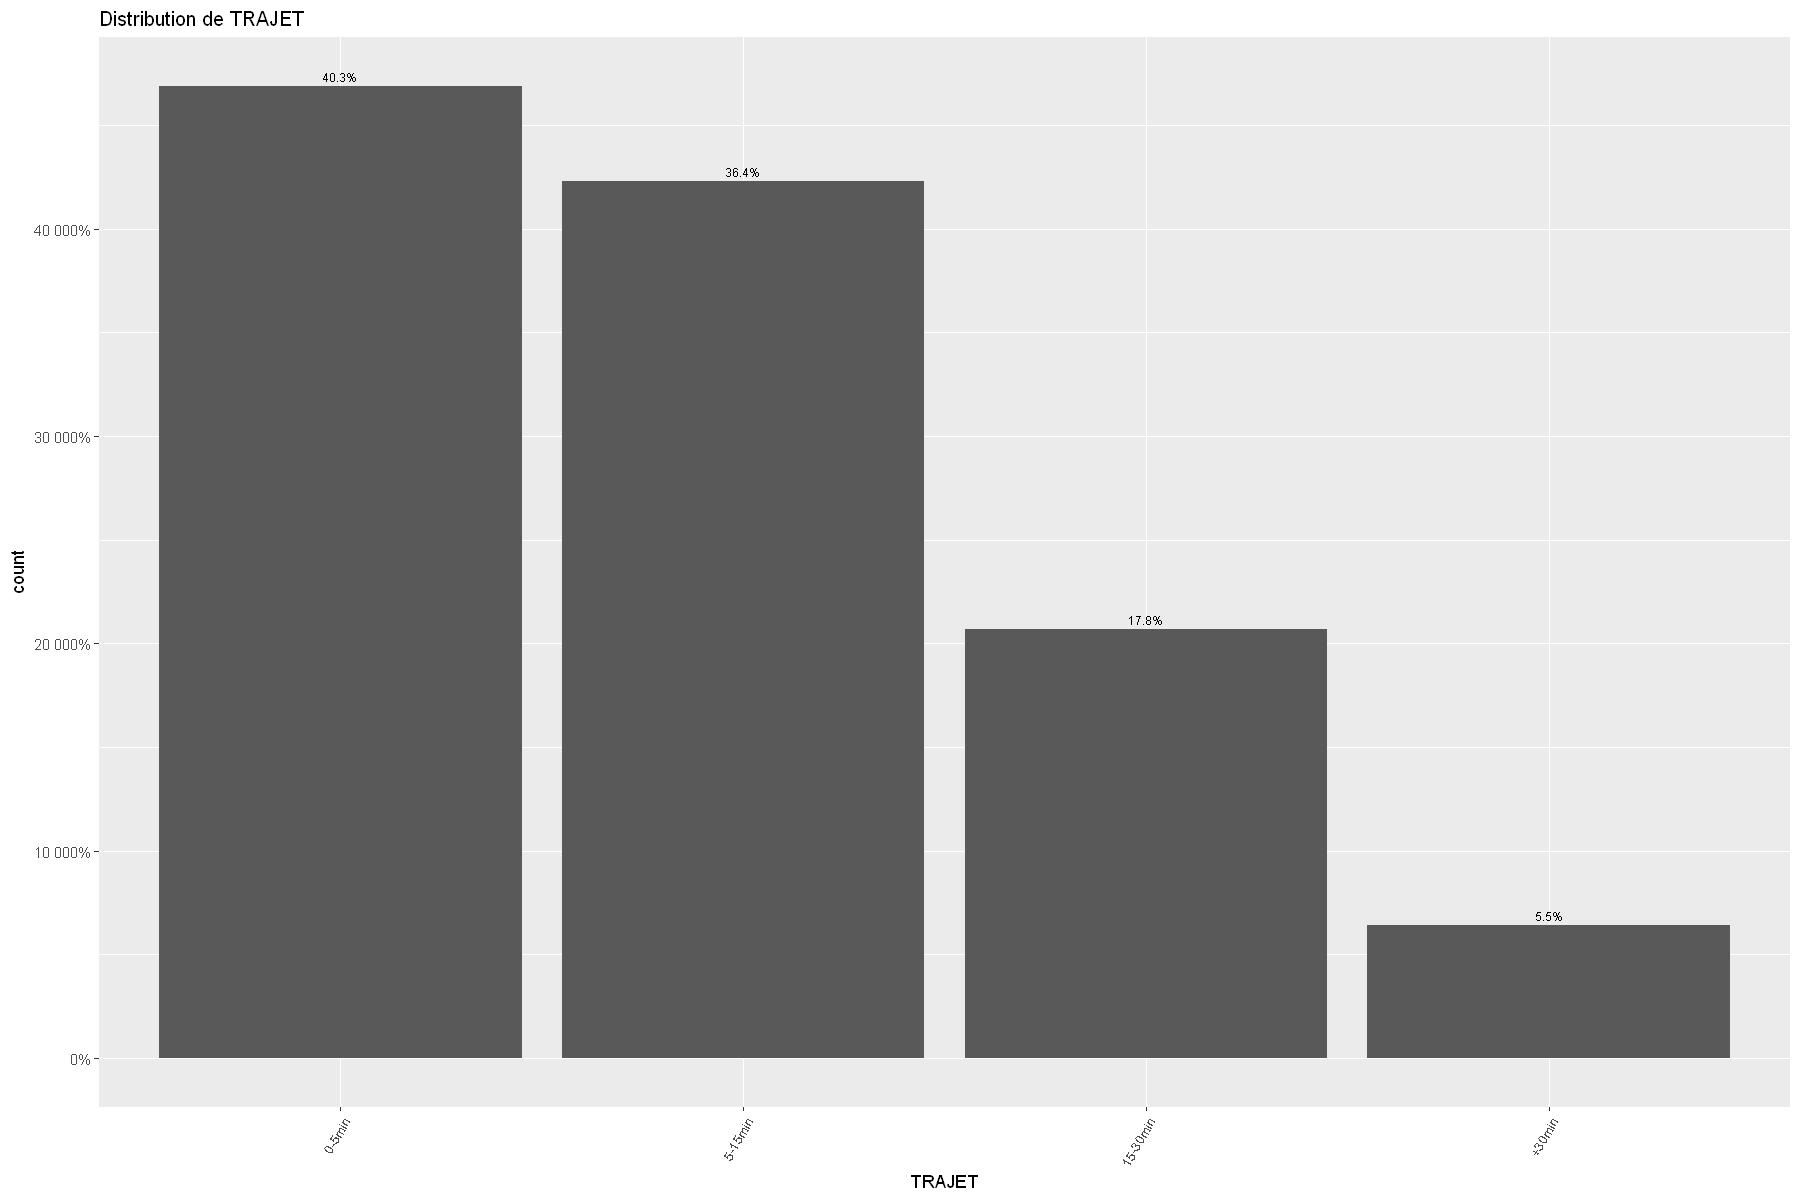

In [127]:
print(plot_distribution(insa_cleaned_1, "TRAJET"))

D'après les résultats de l'enquête, nous constatons que près de 80 % des étudiants mettent moins de 15 minutes pour se rendre à l'école et que près de 95 % des étudiants mettent moins de 30 minutes. Cela montre que la plupart des étudiants bénéficient de bonnes conditions de déplacement (ne nécessitant pas trop de temps) pour se rendre à l'école.

Je souhaite vérifier si le temps de trajet pour se rendre à l'école dépend du type de logement. En effet, je pense que de nombreux étudiants vivent seuls dans des résidences autour de l'école, ce qui rend leur temps de trajet très court. De plus, je me pose si ceux qui ont un temps de trajet long parce qu'ils louent un logement partagé ou qu'ils vivent avec leur famille loin de l'école.

          
           seul colocation foyer familial
  0-5min    441         27              1
  5-15min   319         99              5
  15-30min  108         74             25
  +30min     12         14             38


Warning message in chisq.test(contingency_table):
"Chi-squared approximation may be incorrect"



	Pearson's Chi-squared test

data:  contingency_table
X-squared = 507.4, df = 6, p-value < 2.2e-16



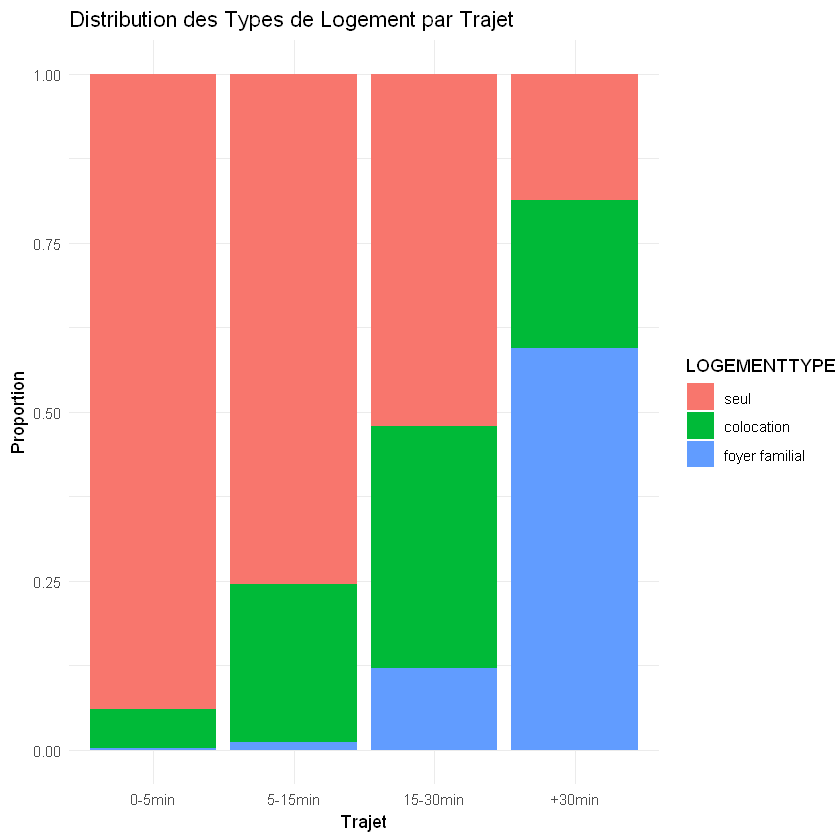

In [36]:
# Créer une table de contingence pour TRAJET et LOGEMENTTYPE
contingency_table <- table(insa_cleaned_1$TRAJET, insa_cleaned_1$LOGEMENTTYPE)

# Afficher la table de contingence
print(contingency_table)

# Réaliser le test du Chi-Square
chi_square_test <- chisq.test(contingency_table)

# Afficher les résultats du test
print(chi_square_test)

library(ggplot2)

# Visualiser la distribution des LOGEMENTTYPE par TRAJET
ggplot(insa_cleaned_1, aes(x = TRAJET, fill = LOGEMENTTYPE)) +
  geom_bar(position = 'fill') +
  labs(title = 'Distribution des Types de Logement par Trajet',
       x = 'Trajet',
       y = 'Proportion') +
  theme_minimal()


Les résultats avec une p-value < 2,2e-16 et les graphiques confirment qu'il y a suffisamment de preuves pour conclure qu'il existe une relation entre les deux variables. Nous observons que les étudiants vivant seuls ont tendance à vivre plus près de l'école pour faciliter leurs déplacements, tandis que ceux qui ont un temps de trajet plus long sont principalement ceux qui vivent en foyer familial.

### LOGEMENT

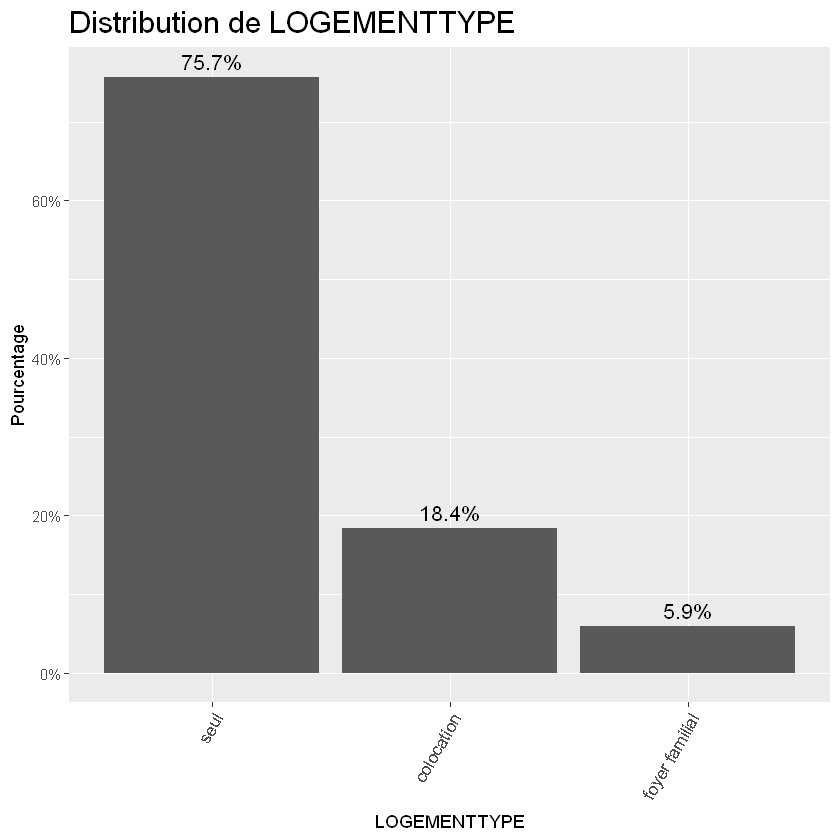

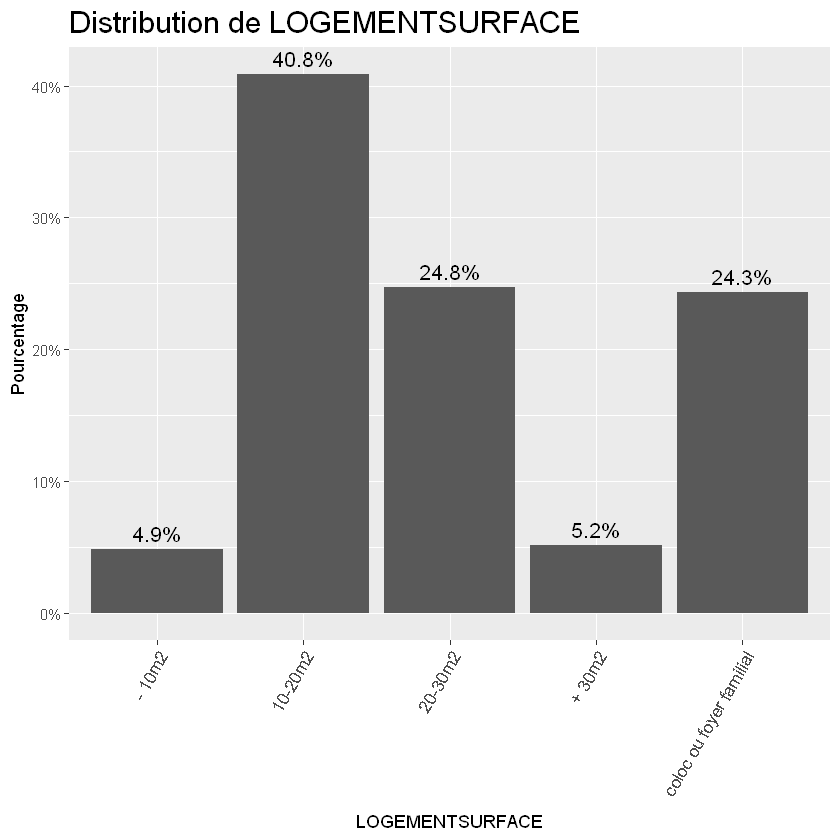

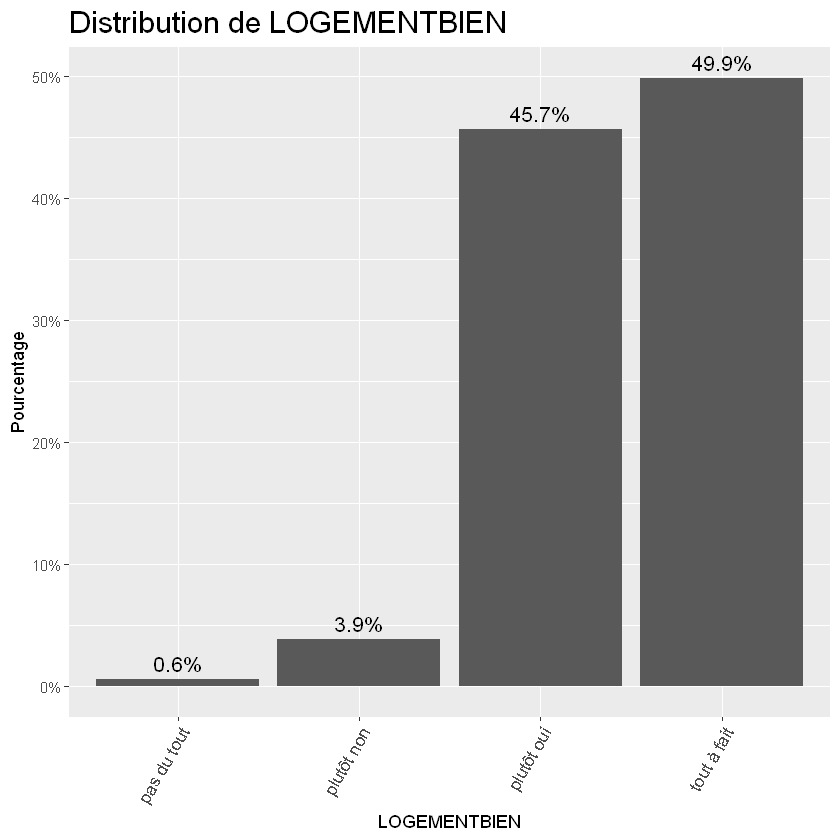

In [40]:
# Liste des variables liées au logement
variables_to_plot <- c("LOGEMENTTYPE", "LOGEMENTSURFACE", "LOGEMENTBIEN")

# Générer et enregistrer des graphiques pour chaque variable du groupe
for (var in variables_to_plot) {
  print(plot_distribution(insa_cleaned_1, var))
}

Nous constatons que la majorité des étudiants (3/4) vivent seuls, avec une forte proportion vivant dans des logements de 10 à 30 m² (86,7 % des 75,7 %, soit 65,6 %). Cette distribution correspond à une distribution normale, où les valeurs sont concentrées autour de la moyenne et diminuent aux valeurs extrêmes comme -10 m² ou +30 m².

De plus, pour la variable LOGEMENTBIEN, nous observons que presque tous les étudiants se sentent satisfaits de leur logement (>95 %). Enfin, je souhaite vérifier si la satisfaction par rapport au logement dépend du type du logement. 

In [47]:
# Créer une table de contingence pour LOGEMENTBIEN et LOGEMENTTYPE
contingency_table <- table(insa_cleaned_1$LOGEMENTBIEN, insa_cleaned_1$LOGEMENTTYPE)

# Afficher la table de contingence
print(contingency_table)

# Réaliser le test du Chi-Square
chi_square_test <- chisq.test(contingency_table)

# Afficher les résultats du test
print(chi_square_test)

             
              seul colocation foyer familial
  pas du tout    6          1              0
  plutôt non    36          8              1
  plutôt oui   436         74             21
  tout à fait  402        131             47


Warning message in chisq.test(contingency_table):
"Chi-squared approximation may be incorrect"



	Pearson's Chi-squared test

data:  contingency_table
X-squared = 27.13, df = 6, p-value = 0.0001369



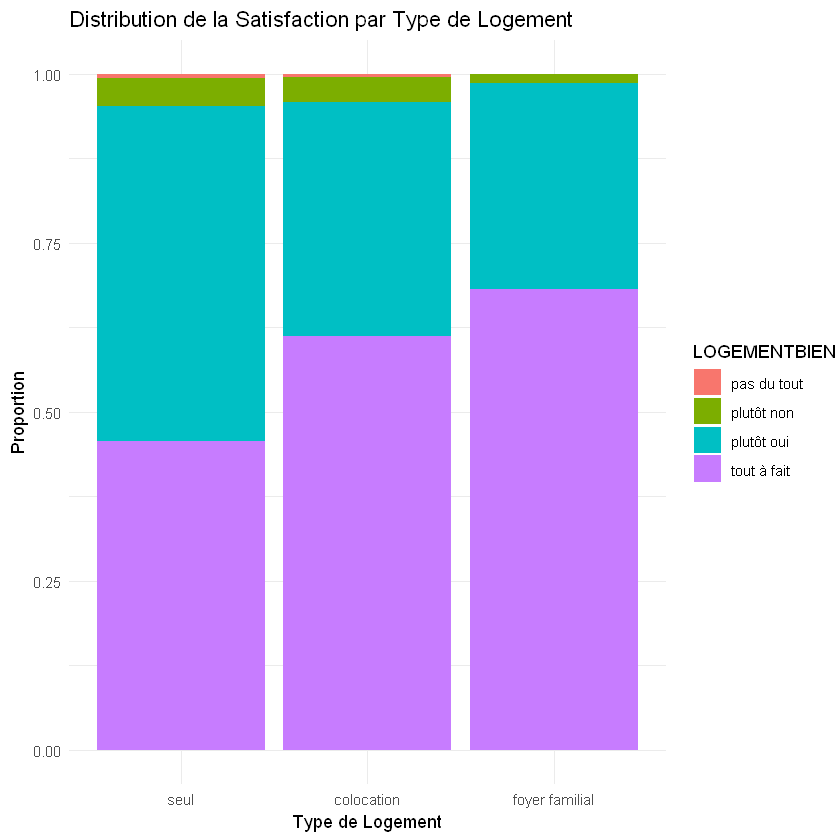

In [50]:
# Visualiser la distribution de la satisfaction par rapport au type de logement
ggplot(insa_cleaned_1, aes(x = LOGEMENTTYPE, fill = LOGEMENTBIEN)) +
  geom_bar(position = 'fill') +
  labs(title = 'Distribution de la Satisfaction par Type de Logement',
       x = 'Type de Logement',
       y = 'Proportion') +
  theme_minimal()

Avec un tableau de contingence, p-valeur < 0,05 et un graphique de distribution, nous pouvons conclure qu'il existe une relation significative entre la satisfaction par rapport au logement et le type de logement. Par exemple, d'après le tableau de contingence, nous constatons que la majorité des étudiants (6 sur 7) qui ne sont pas du tout satisfaits de leur logement vivent seuls. De plus, le graphique de distribution montre que le taux de tout à fait satisfaction des étudiants vivant seuls est inférieur à celui des étudiants vivant en colocation ou en foyer familial.

### Variable ACT_PRO (activité professionnelle)

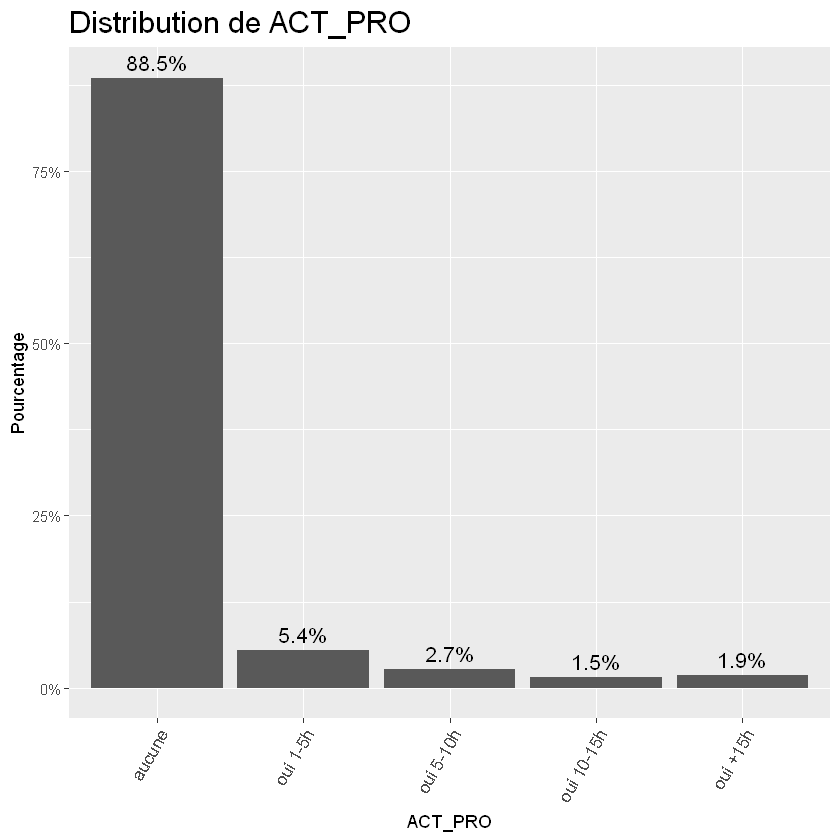

In [53]:
print(plot_distribution(insa_cleaned_1, "ACT_PRO"))

Nous constatons que la majorité des étudiants de notre école (88,5 %) n'exercent pas d'activité rémunérée en parallèle de leurs études. Cela peut s'expliquer par la charge de travail importante de notre programme, qui pousse les étudiants à se concentrer principalement sur leurs études et à ne pas avoir le temps de travailler à côté, ou seulement un temps réduit (moins de 5 heures).

### Variable BOURSIER

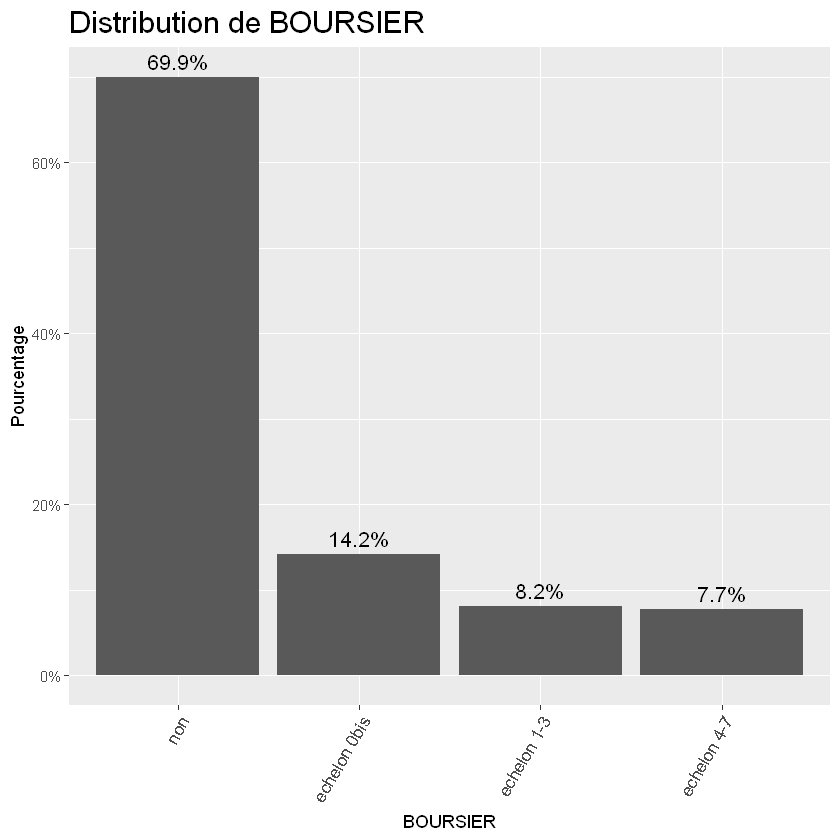

In [54]:
print(plot_distribution(insa_cleaned_1, "BOURSIER"))

Le graphique montre que la majorité des étudiants ne reçoivent pas de soutien financier sous forme de bourse (69,9 %), et parmi ceux qui en bénéficient, la plupart ne reçoivent qu'un faible niveau de soutien (14,2 %). Cela indique qu'un certain nombre d'étudiants ont besoin d'un soutien financier, mais pas de manière significative. Cependant, une minorité d'étudiants ont des besoins financiers élevés ou répondent aux critères pour recevoir des bourses à des niveaux plus élevés.

### Variable HANDICAP

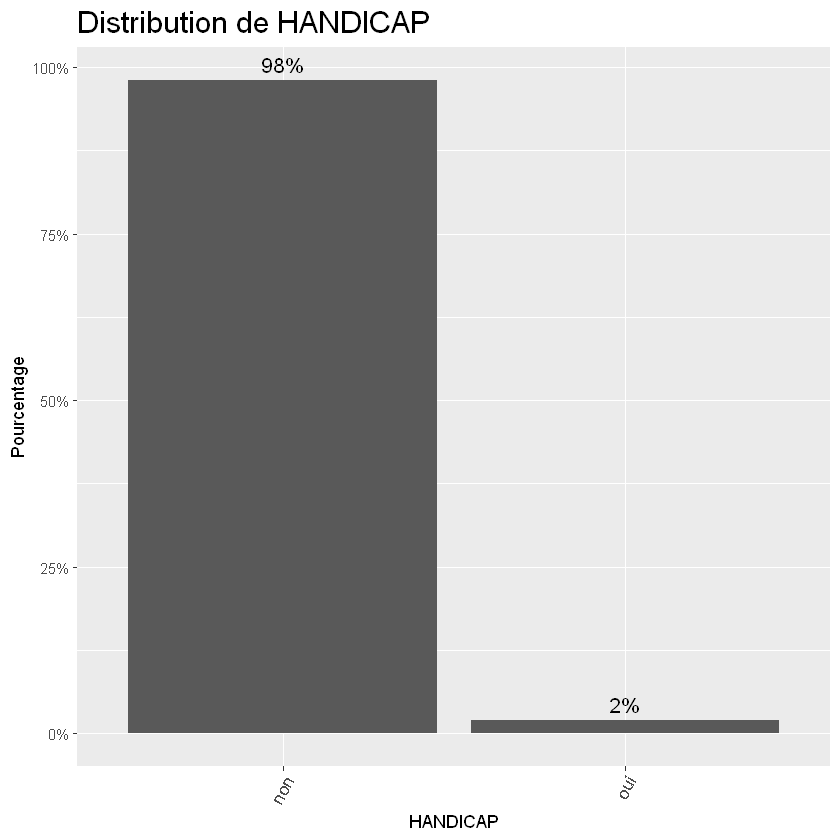

In [55]:
print(plot_distribution(insa_cleaned_1, "HANDICAP"))

Le graphique montre que la majorité des étudiants ne rencontrent pas de problèmes de handicap (98%), et qu'il n'y a qu'un petit nombre d'étudiants en situation de handicap. Cependant, il est nécessaire de mettre en place des mesures pour aider ces étudiants en difficulté.

### Variable TIERSTEMPS

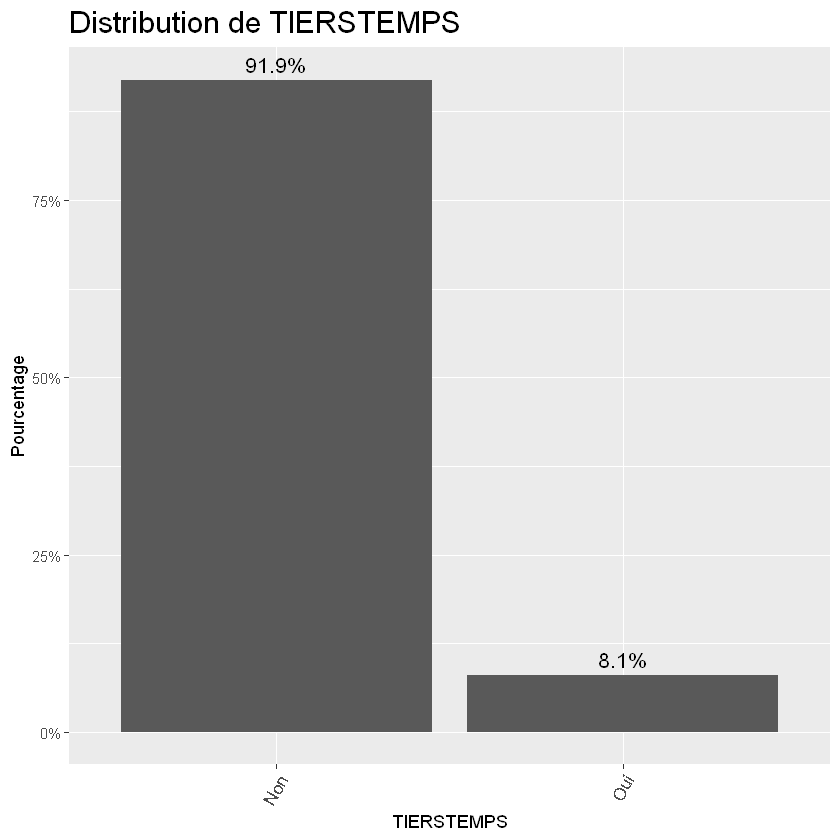

In [56]:
print(plot_distribution(insa_cleaned_1, "TIERSTEMPS"))

In [57]:
# Créer une table de contingence pour TIERSTEMPS et BACTYPE
contingency_table <- table(insa_cleaned_1$TIERSTEMPS, insa_cleaned_1$BACTYPE)

# Afficher la table de contingence
print(contingency_table)

# Réaliser le test du Chi-Square
chi_square_test <- chisq.test(contingency_table)

# Afficher les résultats du test
print(chi_square_test)

# Interprétation du résultat
if (chi_square_test$p.value < 0.05) {
  print("Nous rejetons l'hypothèse nulle (H0). Il y a une relation significative entre TIERSTEMPS et BACTYPE.")
} else {
  print("Nous ne rejetons pas l'hypothèse nulle (H0). Il n'y a pas de relation significative entre TIERSTEMPS et BACTYPE.")
}



     
       Fr Fr_etranger equi_Fr etranger
  Non 964          54       5       46
  Oui  50           3       1       40


Warning message in chisq.test(contingency_table):
"Chi-squared approximation may be incorrect"



	Pearson's Chi-squared test

data:  contingency_table
X-squared = 185.71, df = 3, p-value < 2.2e-16

[1] "Nous rejetons l'hypothèse nulle (H0). Il y a une relation significative entre TIERSTEMPS et BACTYPE."


In [58]:
# Créer une table de contingence pour TIERSTEMPS et HANDICAP
contingency_table <- table(insa_cleaned_1$TIERSTEMPS, insa_cleaned_1$HANDICAP)

# Afficher la table de contingence
print(contingency_table)

# Réaliser le test du Chi-Square
chi_square_test <- chisq.test(contingency_table)

# Afficher les résultats du test
print(chi_square_test)

# Interprétation du résultat
if (chi_square_test$p.value < 0.05) {
  print("Nous rejetons l'hypothèse nulle (H0). Il y a une relation significative entre TIERSTEMPS et HANDICAP.")
} else {
  print("Nous ne rejetons pas l'hypothèse nulle (H0). Il n'y a pas de relation significative entre TIERSTEMPS et HANDICAP.")
}


     
       non  oui
  Non 1064    5
  Oui   76   18


Warning message in chisq.test(contingency_table):
"Chi-squared approximation may be incorrect"



	Pearson's Chi-squared test with Yates' continuity correction

data:  contingency_table
X-squared = 146.06, df = 1, p-value < 2.2e-16

[1] "Nous rejetons l'hypothèse nulle (H0). Il y a une relation significative entre TIERSTEMPS et HANDICAP."


Le graphique montre que la majorité (91.9%) des étudiants n'ont pas besoin de soutien en termes de temps supplémentaire, et seulement quelques étudiants bénéficient de ce soutien. D'après le tableau de contingence et le test du Khi-deux, nous constatons que la variable TIERSTEMPS dépend des variables BACTYPE et HANDICAP. Cela est presque évident, car la majorité des étudiants bénéficiant de TIERSTEMPS sont des étudiants étrangers ayant des difficultés en français et des étudiants en situation de handicap.

### Variable STRESS

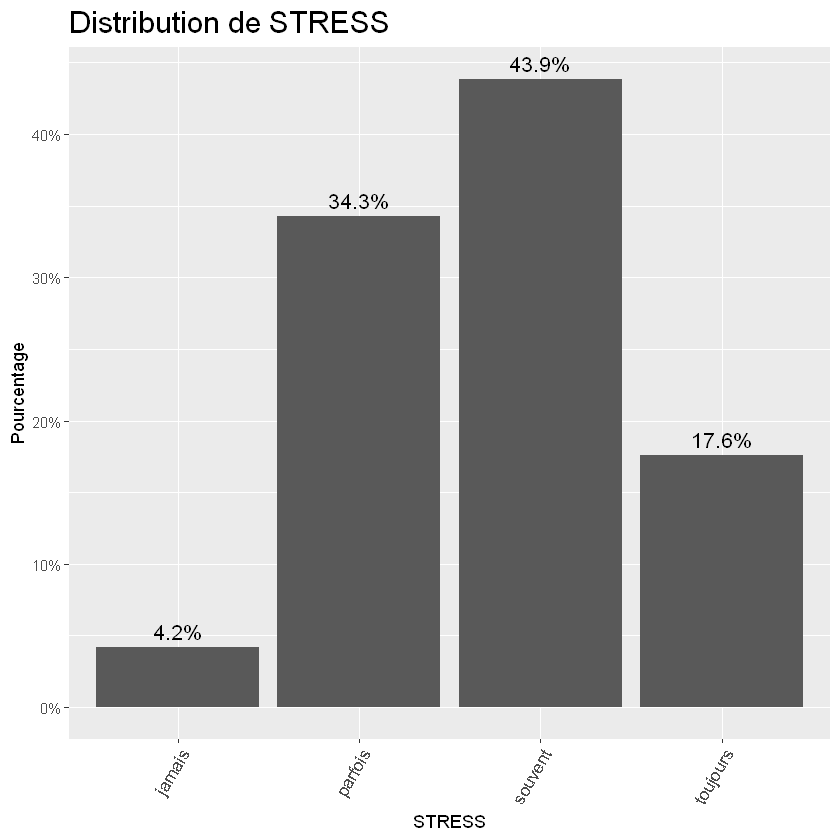

In [59]:
print(plot_distribution(insa_cleaned_1, "STRESS"))

Nous constatons que le faible pourcentage d'étudiants qui ne se sentent jamais stressés indique que la plupart des étudiants doivent faire face à un certain niveau de stress pendant leurs études. De plus, le taux élevé d'étudiants souvent ou toujours stressés (environ 60 %) est également préoccupant, car un stress fréquent peut avoir des effets négatifs sur la santé des étudiants.

### Variable COMMENTAIRE et COMCONSTRUCTIFS

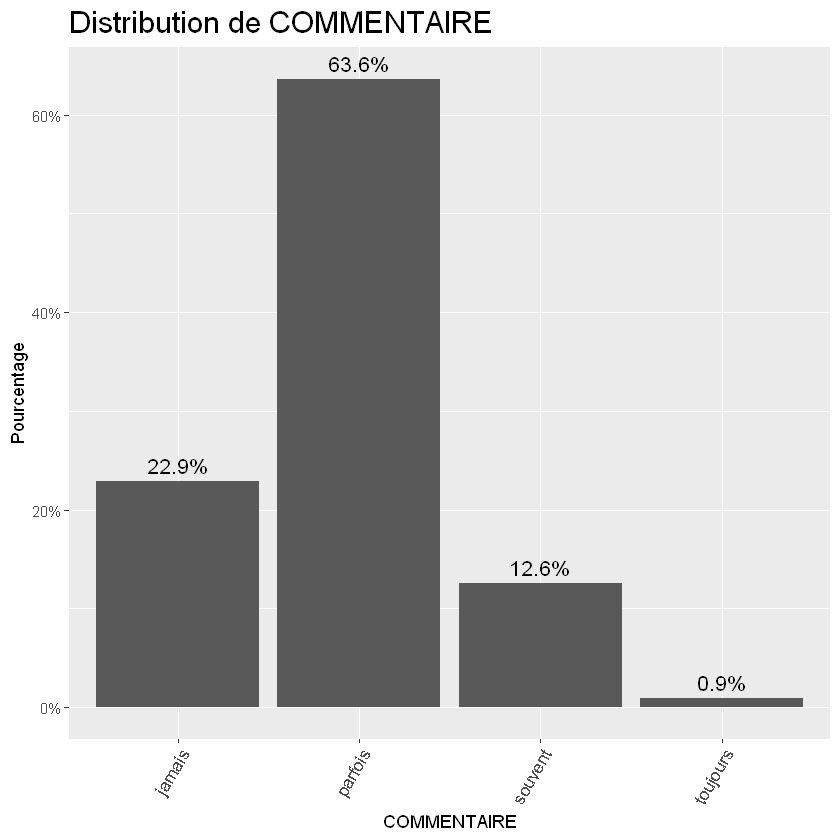

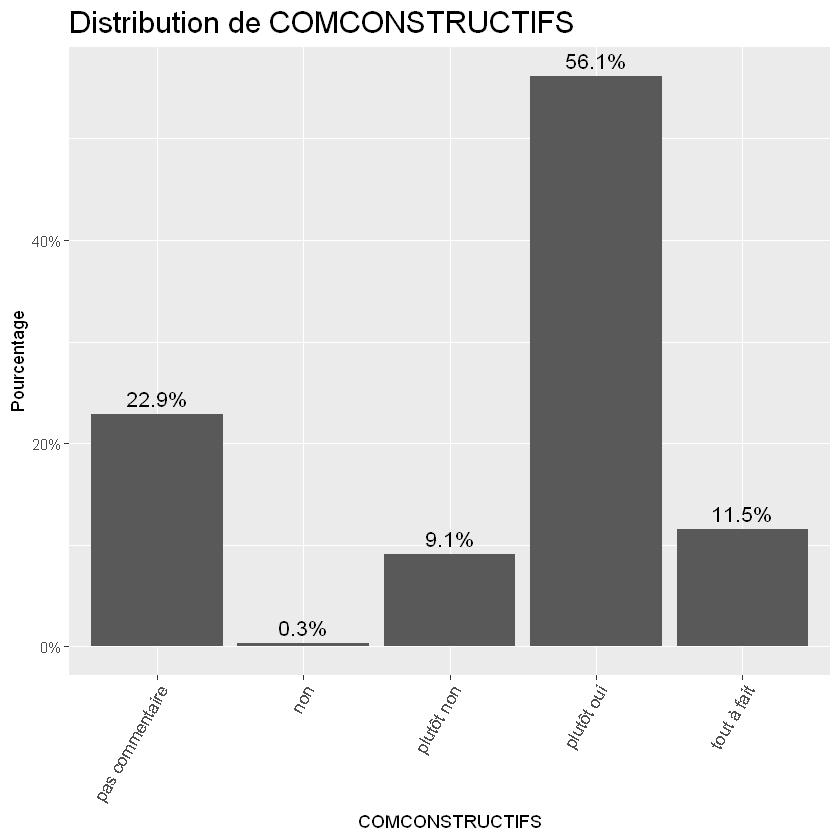

In [60]:
print(plot_distribution(insa_cleaned_1, "COMMENTAIRE"))
print(plot_distribution(insa_cleaned_1, "COMCONSTRUCTIFS"))


Nous constatons que la majorité des étudiants reçoivent occasionnellement ou fréquemment des commentaires (feedback) de leurs enseignants sur leur travail (75 %), dont 87,7 % (67,6/77,1) sont des évaluations constructives. Un nombre restreint d'étudiants indiquent que les commentaires sont apparemment non constructifs, et très peu signalent des commentaires non constructifs.

### Variable ETUDE_SEM

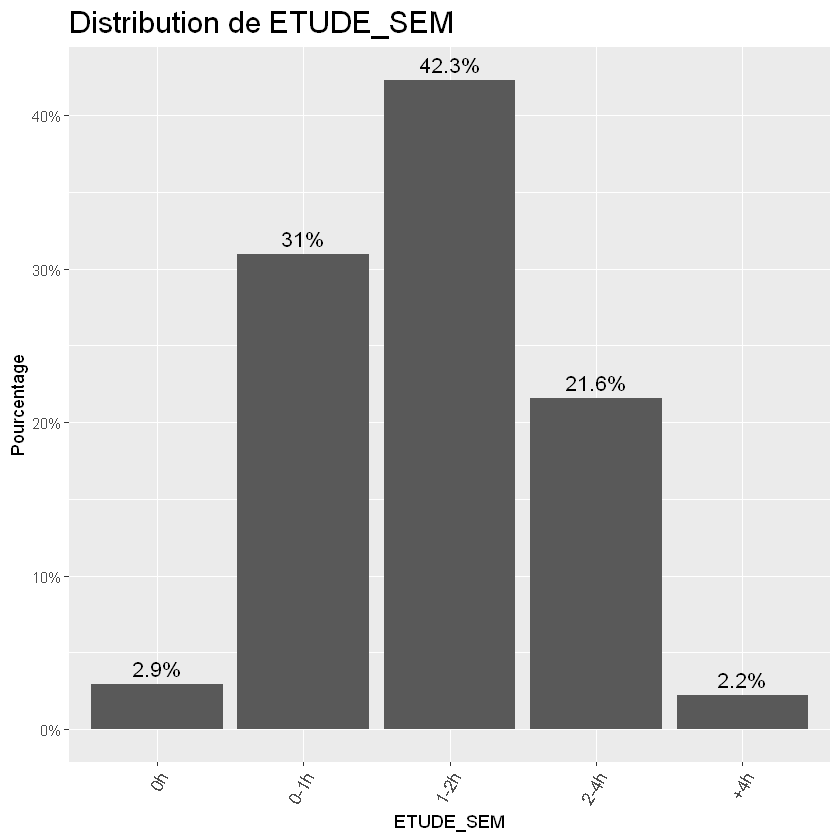

In [62]:
print(plot_distribution(insa_cleaned_1, "ETUDE_SEM"))

Nous constatons que la majorité des étudiants étudient moins de 4 heures par jour en semaine en dehors des cours à l'école (environ 95 %), avec une proportion maximale étudiant entre 1 et 2 heures (42,3 %). Cela est compréhensible, car les étudiants passent généralement toute la journée à l'école, n'ayant donc que le soir ou tôt le matin pour étudier. Ainsi, étudier plus de 4 heures par jour en dehors des cours est très rare (2,2 %).

En outre, un nombre significatif d'étudiants étudient moins d'une heure par jour (environ un tiers). Cela peut indiquer que certains étudiants n'ont pas besoin de beaucoup de temps de révision en dehors des cours ou qu'ils ne gèrent pas bien leur temps d'étude. Cependant, le fait qu'une proportion assez importante d'étudiants consacre peu de temps à l'étude peut être préoccupant et potentiellement problématique.

### Variable ETUDEWE

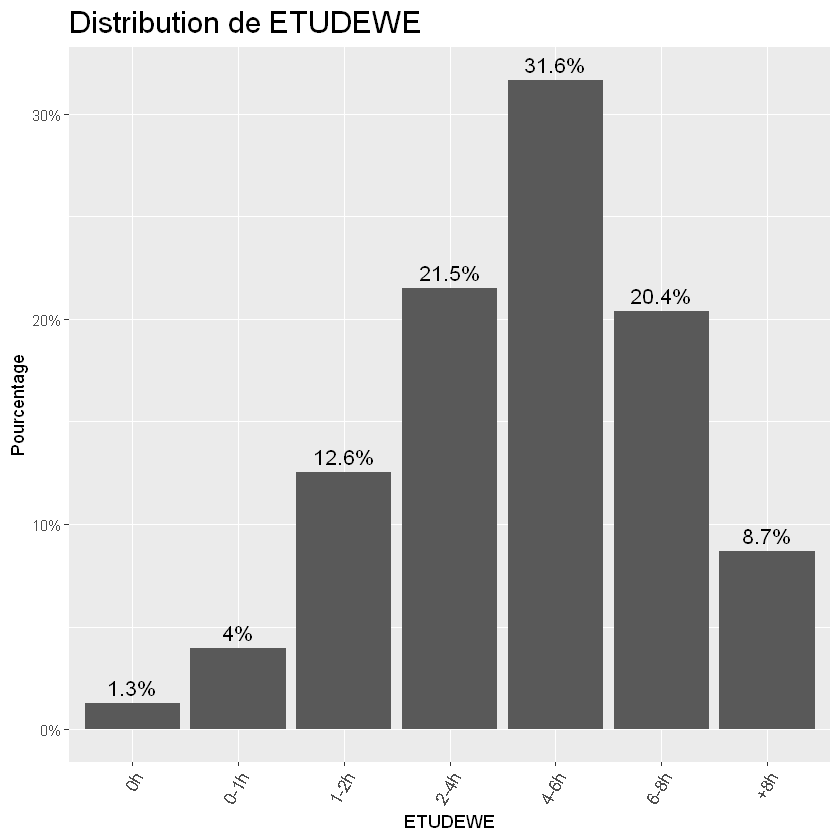

In [63]:
print(plot_distribution(insa_cleaned_1, "ETUDEWE"))

Nous constatons que plus de 80 % des étudiants consacrent plus de 2 heures à l'étude pendant le week-end, la tranche horaire la plus fréquente étant de 4 à 6 heures (31,6 %). Cela montre que la majorité des étudiants consacrent une quantité de temps assez significative à l'étude pendant le week-end.

      
        0h 0-1h 1-2h 2-4h 4-6h 6-8h +8h
  0h     9    7    7    3    4    3   1
  0-1h   5   35   95  119   73   26   7
  1-2h   1    3   37  115  198  104  34
  2-4h   0    1    7   12   90   95  46
  +4h    0    0    0    1    3    9  13


Warning message in chisq.test(contingency_table):
"Chi-squared approximation may be incorrect"



	Pearson's Chi-squared test

data:  contingency_table
X-squared = 611.48, df = 24, p-value < 2.2e-16

[1] "Nous rejetons l'hypothèse nulle (H0). Il y a une relation significative entre ETUDE_SEM et ETUDEWE."


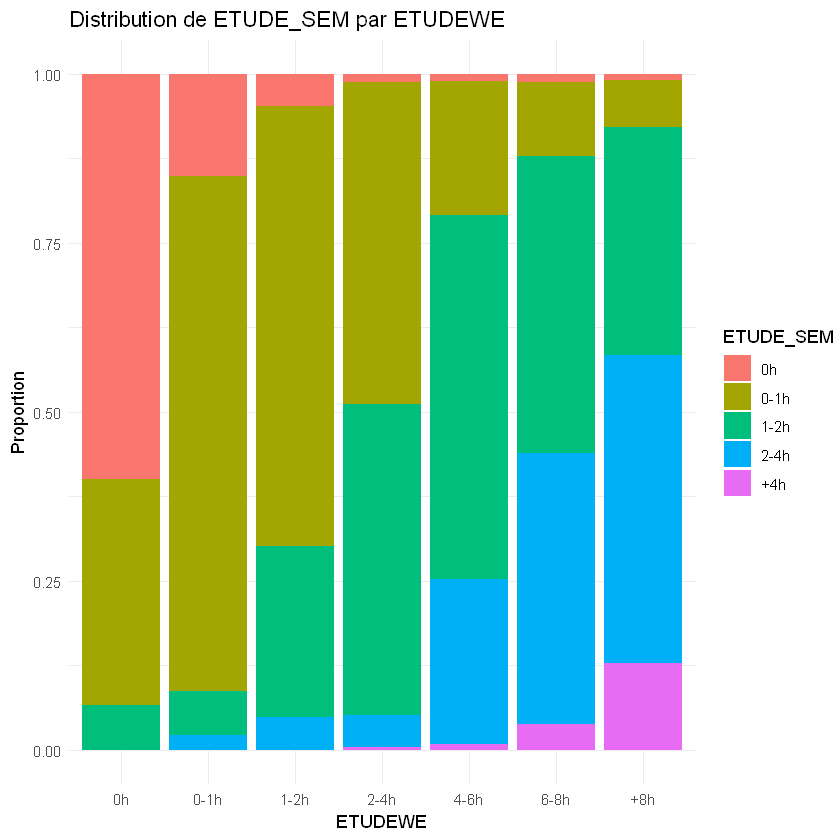

In [65]:
# Créer une table de contingence pour ETUDE_SEM et ETUDEWE
contingency_table <- table(insa_cleaned_1$ETUDE_SEM, insa_cleaned_1$ETUDEWE)

# Afficher la table de contingence
print(contingency_table)

# Réaliser le test du Chi-Square
chi_square_test <- chisq.test(contingency_table)

# Afficher les résultats du test
print(chi_square_test)

# Interprétation du résultat
if (chi_square_test$p.value < 0.05) {
  print("Nous rejetons l'hypothèse nulle (H0). Il y a une relation significative entre ETUDE_SEM et ETUDEWE.")
} else {
  print("Nous ne rejetons pas l'hypothèse nulle (H0). Il n'y a pas de relation significative entre ETUDE_SEM et ETUDEWE.")
}

# Visualiser la distribution de ETUDE_SEM par ETUDEWE
ggplot(insa_cleaned_1, aes(x = ETUDEWE, fill = ETUDE_SEM)) +
  geom_bar(position = 'fill') +
  labs(title = 'Distribution de ETUDE_SEM par ETUDEWE',
       x = 'ETUDEWE',
       y = 'Proportion') +
  theme_minimal()

Il y a une relation significative entre ETUDE_SEM et ETUDEWE. Nous constatons que le temps d'étude en semaine et le temps d'étude pendant le week-end sont généralement proportionnels. Ceux qui étudient davantage en semaine ont également tendance à étudier davantage pendant le week-end.

### Variable ETUDEGROUPE

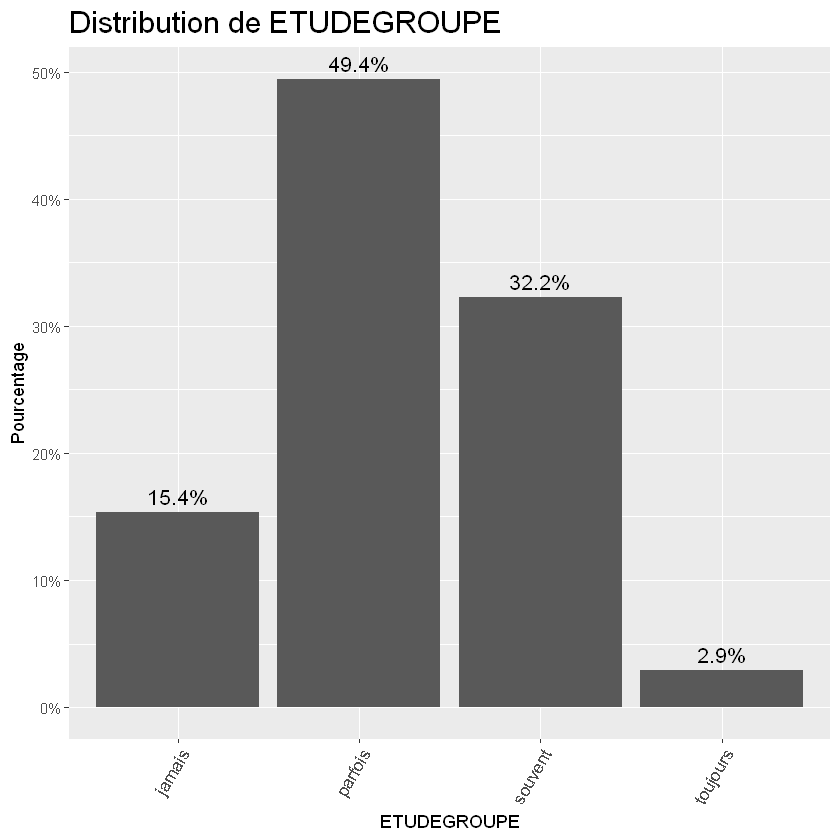

In [66]:
print(plot_distribution(insa_cleaned_1, "ETUDEGROUPE"))

La majorité des étudiants ont tendance à étudier en groupe (~80 %) au moins occasionnellement, ce qui peut indiquer que l'apprentissage en groupe est considéré comme une méthode efficace et populaire parmi les étudiants. Cependant, il y a aussi une minorité d'étudiants qui ne travaillent jamais ou toujours en groupe, ce qui peut être dû à des préférences personnelles ou à des exigences d'apprentissage spécifiques.

### Variable ETUDEDEHORS et ETUDEDOM

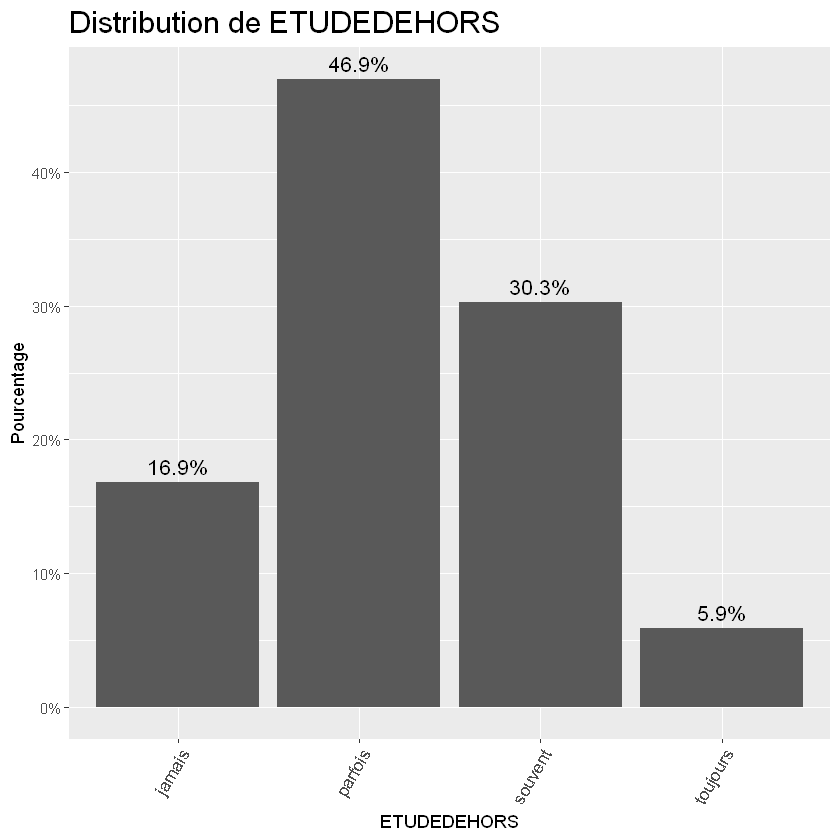

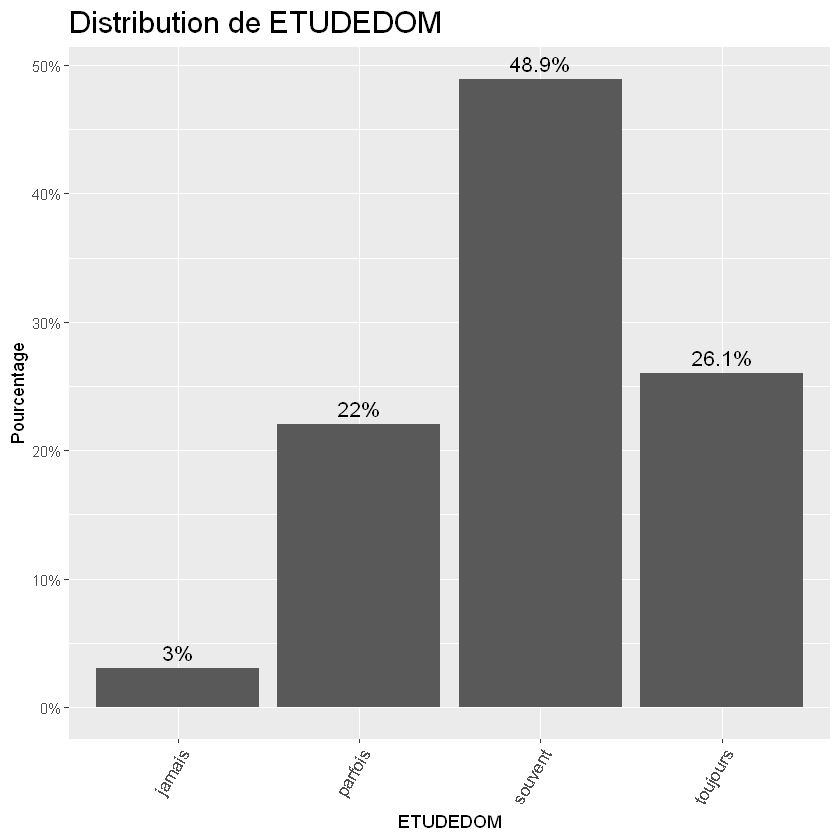

In [67]:
print(plot_distribution(insa_cleaned_1, "ETUDEDEHORS"))
print(plot_distribution(insa_cleaned_1, "ETUDEDOM"))

          
           jamais parfois souvent toujours
  jamais        5       9      12      170
  parfois       2      48     385      111
  souvent       6     161     169       16
  toujours     22      38       3        6


Warning message in chisq.test(contingency_table):
"Chi-squared approximation may be incorrect"



	Pearson's Chi-squared test

data:  contingency_table
X-squared = 908.47, df = 9, p-value < 2.2e-16



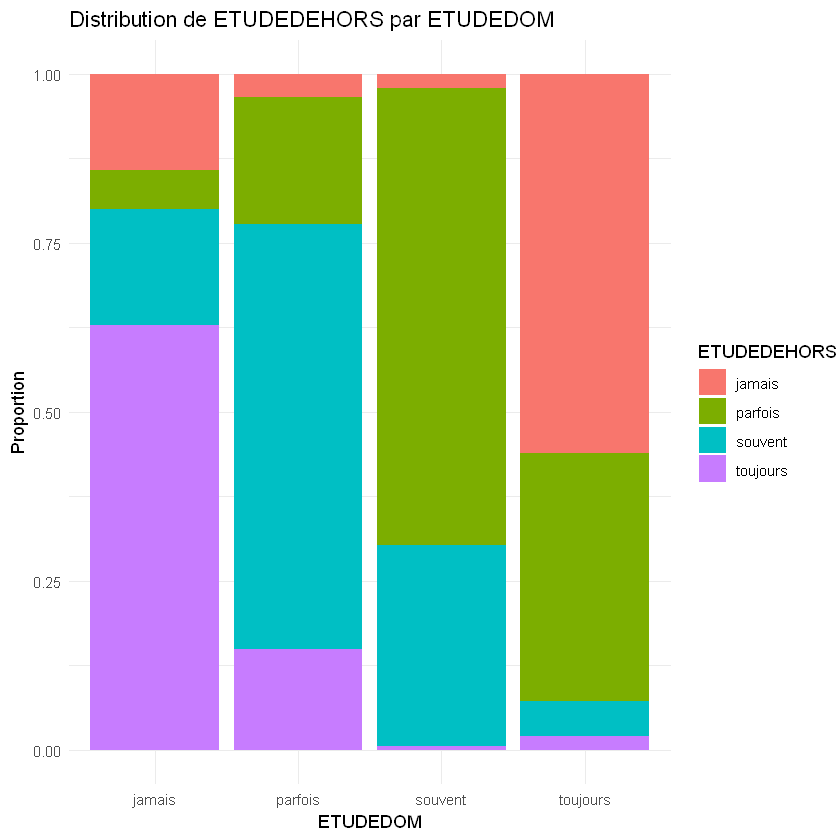

In [68]:
# Créer une table de contingence pour ETUDEDEHORS et ETUDEDOM
contingency_table <- table(insa_cleaned_1$ETUDEDEHORS, insa_cleaned_1$ETUDEDOM)

# Afficher la table de contingence
print(contingency_table)

# Réaliser le test du Chi-Square
chi_square_test <- chisq.test(contingency_table)

# Afficher les résultats du test
print(chi_square_test)

library(ggplot2)

# Visualiser la distribution de ETUDEDEHORS par ETUDEDOM
ggplot(insa_cleaned_1, aes(x = ETUDEDOM, fill = ETUDEDEHORS)) +
  geom_bar(position = 'fill') +
  labs(title = 'Distribution de ETUDEDEHORS par ETUDEDOM',
       x = 'ETUDEDOM',
       y = 'Proportion') +
  theme_minimal()


Nous constatons une opposition entre les variables ETUDEDEHORS et ETUDEDOM, ce qui est compréhensible car ceux qui étudient fréquemment à la maison le font rarement à l'extérieur, et inversement. De plus, le pourcentage élevé d'étudiants qui étudient souvent ou toujours à la maison (75 %) indique que les étudiants préfèrent généralement étudier chez eux plutôt qu'à l'extérieur.

### Variable PRESENCE_CM, PRESENCE_TD et PRESENCE_TP

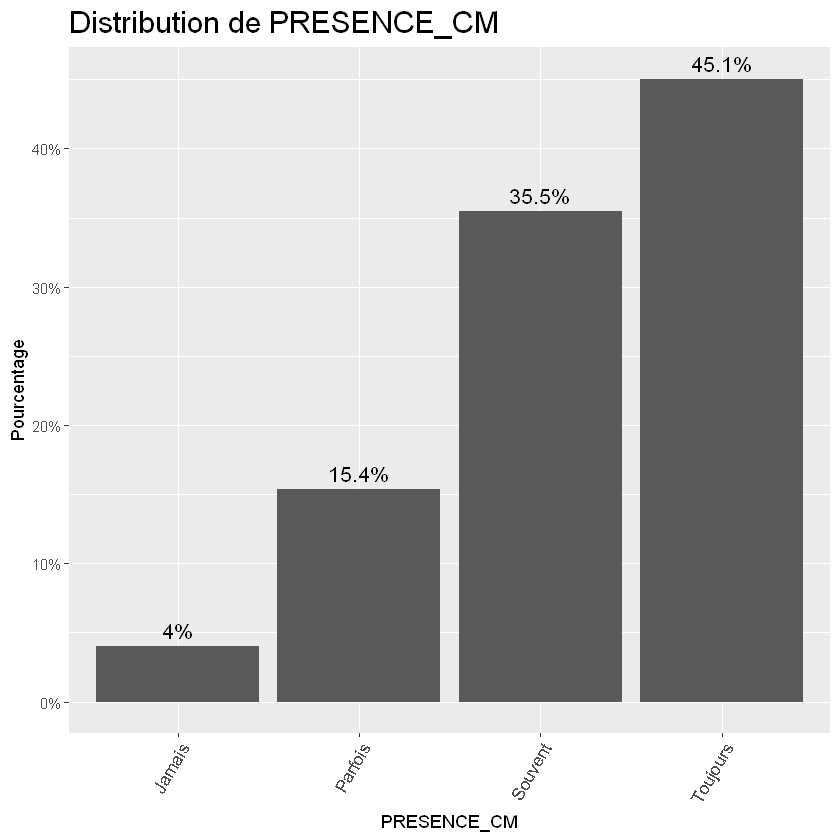

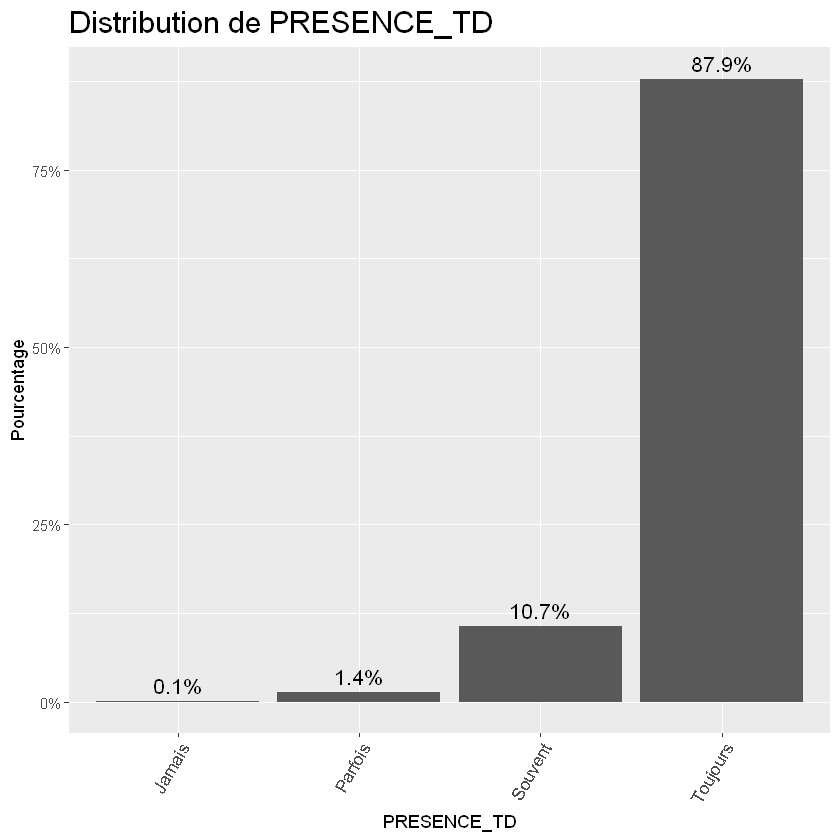

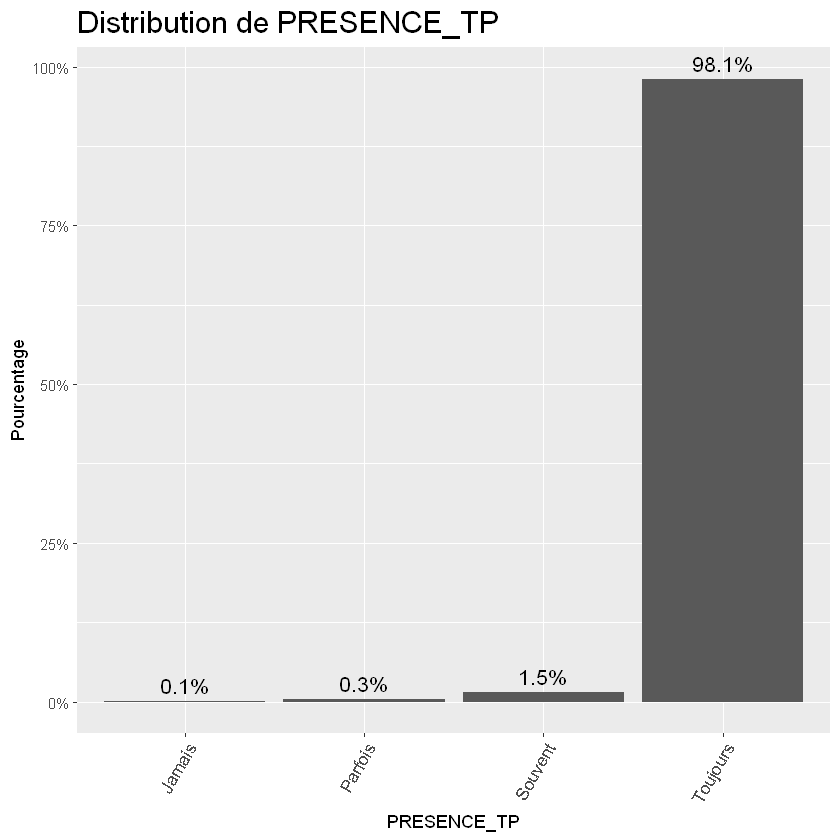

In [70]:
print(plot_distribution(insa_cleaned_1, "PRESENCE_CM"))
print(plot_distribution(insa_cleaned_1, "PRESENCE_TD"))
print(plot_distribution(insa_cleaned_1, "PRESENCE_TP"))

Nous constatons que la majorité des étudiants (environ 80 %) sont fréquemment ou toujours présents aux cours magistraux (CM). Cependant, il est important de noter qu'une proportion non négligeable, près de 20 %, des étudiants n'assistent qu'occasionnellement ou jamais à ces cours, ce qui mérite notre attention. Cependant, pour les cours de travaux dirigés (TD) et de travaux pratiques (TP), le taux de participation augmente de manière significative : 98,5 % des étudiants assistent fréquemment ou toujours aux TD. Pour les TP, 98,1 % des étudiants y assistent toujours et une participation quasi totale (99,6 %) pour ceux qui assistent fréquemment ou toujours aux TP. Cela peut s'expliquer par le fait que certains étudiants préfèrent apprendre les concepts théoriques des cours magistraux (CM) de manière autonome à la maison et participent davantage aux sessions axées sur les exercices pratiques et les applications concrètes. Cette tendance est compréhensible étant donné que notre école est une école d'ingénieurs, où les étudiants accordent une grande importance à l'apprentissage pratique.

### Variable CONCENTRATION_CM, CONCENTRATION_TD et CONCENTRATION_TP

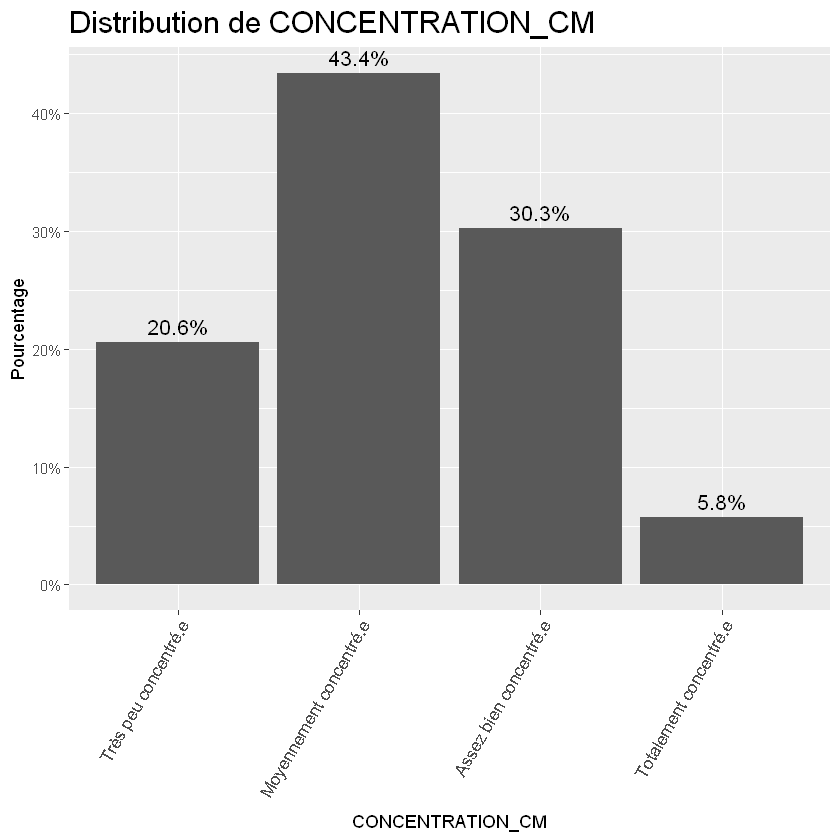

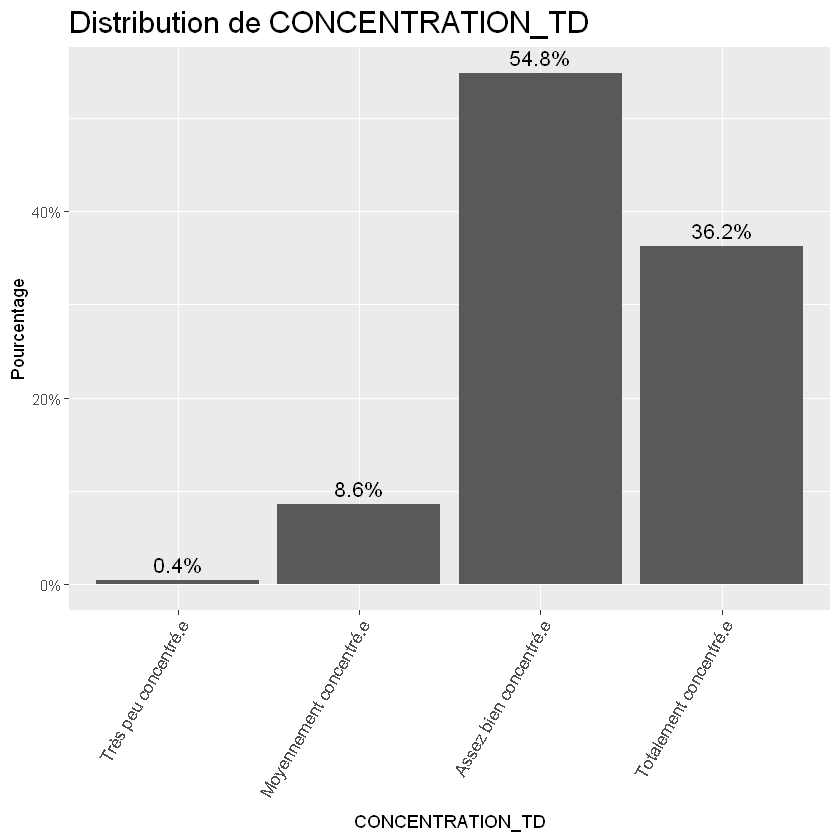

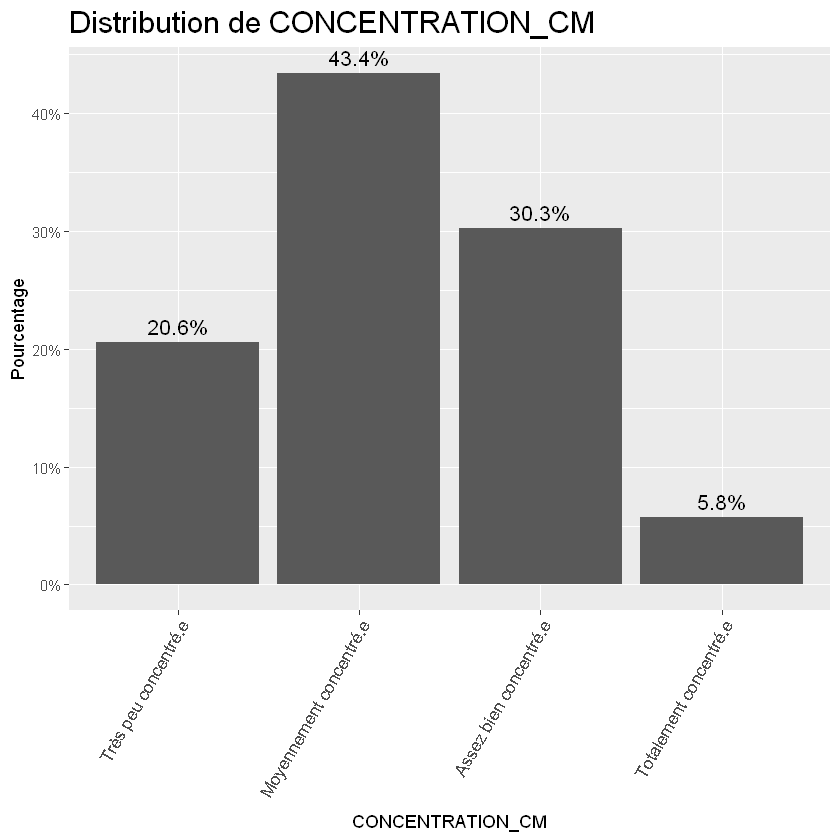

In [74]:
print(plot_distribution(insa_cleaned_1, "CONCENTRATION_CM"))
print(plot_distribution(insa_cleaned_1, "CONCENTRATION_TD"))
print(plot_distribution(insa_cleaned_1, "CONCENTRATION_CM"))

Nous pouvons établir un argument similaire avec les variables de présence, en notant que les étudiants ont tendance à se concentrer davantage lors des séances de TD et particulièrement lors des TP. Cependant, une situation préoccupante se dessine : une grande partie des étudiants (64 %) sont peu ou moyennement concentrés. La situation s'améliore considérablement pour les TD et les TP, où plus de 90 % des étudiants sont assez bien ou totalement concentrés.

                         
                          Très peu concentré.e Moyennement concentré.e
  Très peu concentré.e                       5                      64
  Moyennement concentré.e                    0                      23
  Assez bien concentré.e                     0                       8
  Totalement concentré.e                     0                       5
                         
                          Assez bien concentré.e Totalement concentré.e
  Très peu concentré.e                       132                     38
  Moyennement concentré.e                    355                    127
  Assez bien concentré.e                     138                    206
  Totalement concentré.e                      12                     50


Warning message in chisq.test(contingency_table):
"Chi-squared approximation may be incorrect"



	Pearson's Chi-squared test

data:  contingency_table
X-squared = 311.74, df = 9, p-value < 2.2e-16



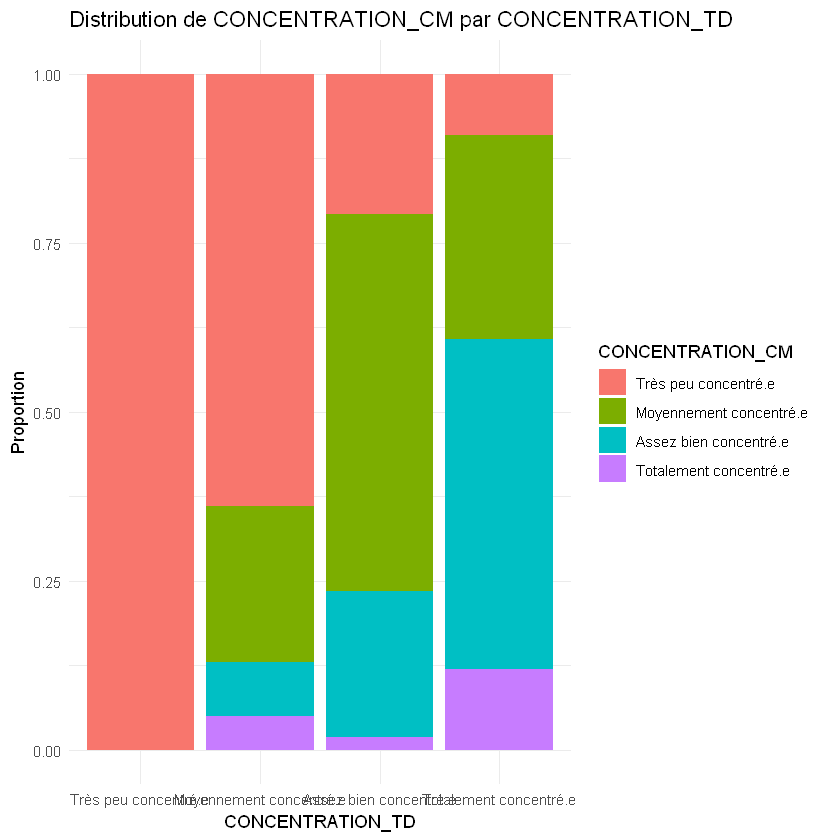

In [72]:
# Créer une table de contingence pour CONCENTRATION_CM et CONCENTRATION_TD
contingency_table <- table(insa_cleaned_1$CONCENTRATION_CM, insa_cleaned_1$CONCENTRATION_TD)

# Afficher la table de contingence
print(contingency_table)

# Réaliser le test du Chi-Square
chi_square_test <- chisq.test(contingency_table)

# Afficher les résultats du test
print(chi_square_test)

ggplot(insa_cleaned_1, aes(x = CONCENTRATION_TD, fill = CONCENTRATION_CM)) +
  geom_bar(position = 'fill') +
  labs(title = 'Distribution de CONCENTRATION_CM par CONCENTRATION_TD',
       x = 'CONCENTRATION_TD',
       y = 'Proportion') +
  theme_minimal()


D'après les résultats du test, nous pouvons observer que les variables CONCENTRATION_CM et CONCENTRATION_TD ont une relation significative, et cette relation est proportionnelle. En d'autres termes, les étudiants qui se concentrent bien pendant les cours magistraux (CM) ont tendance à être également concentrés lors des travaux dirigés (TD). Cela est assez compréhensible et prévisible, et j'ai effectué ce test simplement pour le vérifier.

## IV. Analyses statistiques inférentielles

Avant de construire un modèle, on voit un autre problème ici : nous avons des modalités avec des fréquences d'apparition très faibles, par exemple pour les variables LOGEMENTBIEN, ACT_PRO(TRAVAILTEMPS), COMCONSTRUCTIFS(NON), PRESENCE_TD,... Cela rend les estimations des paramètres de ces modalités très instables, entraînant du bruit et un surajustement du modèle. Par conséquent, la mise en commun augmente le nombre d'observations par groupe, aidant ainsi le modèle à apprendre des modèles de manière plus cohérente. De plus, regrouper les variables avec une fréquence faible mais des significations similaires aide à réduire la complexité du modèle, car chaque modalité dans une variable catégorielle crée une nouvelle dimension spatiale lorsqu’elle est codée à l’aide de la méthode de codage one-hot, entraînant une augmentation du nombre de paramètres à apprendre et un risque accru de surajustement.
Par exemple, si nous avons seulement un étudiant qui choisit SORTIEBAR_tous les jours, et que cet étudiant redouble, nous risquons un surajustement car les variables REDOUBLEMENT et SORTIEBAR_tous les jours seraient complètement corrélées.
Après avoir combiné les modalités à faible fréquence et de signification similaire, nos données seront entièrement propres et prêtes pour la construction du modèle.

In [120]:
insa_cleaned_2 <- insa_cleaned_1 %>%
  mutate(
    LOGEMENTBIEN = fct_collapse(LOGEMENTBIEN,"plutôt non" = c("pas du tout", "plutôt non")),
    ACT_PRO = fct_collapse(ACT_PRO, "oui +5" = c("oui 5-10h", "oui 10-15h", "oui +15h")),
    COMMENTAIRE = fct_collapse(COMMENTAIRE, "souvent" = c("souvent", "toujours")),
    COMCONSTRUCTIFS = fct_collapse(COMCONSTRUCTIFS, "plutôt non" = c("non", "plutôt non")),
    ETUDE_SEM = fct_collapse(ETUDE_SEM, "-1h" = c("0h", "0-1h"), "+2h" = c("2-4h", "+4h") ),
    ETUDEGROUPE = fct_collapse(ETUDEGROUPE, "souvent" = c("souvent", "toujours")),
    ETUDEDOM = fct_collapse(ETUDEDOM, "parfois" = c("jamais", "parfois")),
    PRESENCE_CM = fct_collapse(PRESENCE_CM, "Parfois" = c("Jamais", "Parfois")),
    PRESENCE_TD = fct_collapse(PRESENCE_TD, "Pas toujours" = c("Jamais", "Parfois", "Souvent")),
    PRESENCE_TP = fct_collapse(PRESENCE_TP, "Pas toujours" = c("Jamais", "Parfois", "Souvent")),
    CONCENTRATION_TD = fct_collapse(CONCENTRATION_TD, "Moyennement concentré.e" = c("Très peu concentré.e", "Moyennement concentré.e")),
    CONCENTRATION_TP = fct_collapse(CONCENTRATION_TP, "Moyennement concentré.e" = c("Très peu concentré.e", "Moyennement concentré.e")),
    PREPCOURS_CM = fct_collapse(PREPCOURS_CM, "Souvent" = c("Souvent", "Toujours")),
    COURSNOTES_TD = fct_collapse(COURSNOTES_TD, "Pas toujours" = c("Jamais", "Parfois", "Souvent")),
    COURSNOTES_TP = fct_collapse(COURSNOTES_TP, "Parfois" = c("Jamais", "Parfois")),
    REVISIONSDEB = fct_collapse(REVISIONSDEB, "-4 jours avant" = c("3-4 jours avant", "la veille")),
    CONCENTRATIONPERSO = fct_collapse(CONCENTRATIONPERSO, "moyennement" = c("pas du tout", "moyennement")),
    CONDITIONSTRAVAIL = fct_collapse(CONDITIONSTRAVAIL, "moyennes" = c("mauvaises", "moyennes")),
    AMIS = fct_collapse(AMIS, "parfois" = c("jamais", "parfois")),
    ISOLEMENT = fct_collapse(ISOLEMENT, "souvent" = c("souvent", "toujours")),
    ASSOCIATIF = fct_collapse(ASSOCIATIF, "+10h" = c("10-15h", "15-20h", "+20h")),
    ASSOCIATIF_POSITIF = fct_collapse(ASSOCIATIF_POSITIF, "plutôt non" = c("pas du tout", "plutôt non")),
    SPECTACLES = fct_collapse(SPECTACLES, "+1/mois" = c("1/mois", "1/semaine")),
    SPECTACLES_POSITIF = fct_collapse(SPECTACLES_POSITIF, "plutôt non" = c("pas du tout", "plutôt non")),
    SORTIEBAR = fct_collapse(SORTIEBAR, "plusieurs fois/semaine" = c("plusieurs fois/semaine", "tous les jours")),
    DETENTE = fct_collapse(DETENTE, "parfois" = c("jamais", "parfois")),
    ECRANS = fct_collapse(ECRANS, "-2h" = c("0-1h", "1-2h"), "+6h" = c("6-8h", "+8h")),
    ALIMENTATION = fct_collapse(ALIMENTATION, "plutôt non" = c("pas du tout", "plutôt non")),
    ADEQUATION = fct_collapse(ADEQUATION, "plutôt non" = c("pas du tout", "plutôt non")),
    PREPMETIER = fct_collapse(PREPMETIER, "plutôt non" = c("pas du tout", "plutôt non")),
    COHORTE = fct_collapse(COHORTE, "NORG-IBER-ENG-AS" = c("NORG", "IBER", "IBER_Fr", "ENG", "ENG_Fr", "AS_Hue", "AS_Fr"), "Arts_Etude" = c("Danse-etude", "Musique-etude", "Theatre-etude")),
    BACTYPE = fct_collapse(BACTYPE, "Fr" = c("Fr", "equi_Fr"))
  )

In [121]:
# Obtenir la liste des variables à partir des noms des colonnes de insa_clean
variables_to_plot <- names(insa_cleaned_2)

# Créer une liste pour stocker les graphiques
plots <- list()

# Générer les graphiques pour chaque variable et les ajouter à la liste
for (var in variables_to_plot) {
  plots[[var]] <- plot_distribution(insa_cleaned_2, var)
}

# Définir le nombre de colonnes et calculer le nombre de lignes nécessaires
ncol <- 4
nrow <- ceiling(length(plots) / ncol)

# Enregistrer les graphiques dans un fichier PDF
pdf("distributions2.pdf", width = 16, height = nrow * 7)  # Ajustez la largeur et la hauteur selon vos besoins
grid.arrange(grobs = lapply(plots, ggplotGrob), ncol = ncol)
dev.off()

png 
  2

D'abord, je souhaite construire un modèle de forêt aléatoire pour tous les étudiants. Pour ce faire, je vais supprimer les variables RATTRAPAGES, REDOUBLEMENT, CLASSEMENTDERNIER, et CLASSEMENT1A, car les étudiants de première année ou les nouveaux entrants n'ont pas de valeurs pour ces variables. Nous allons utiliser la variable cible SENSATIONREUSSITE, car le sentiment de réussir vos études à l’INSA peut décrire la confiance et la certitude des étudiants quant à leurs performances académiques à l'INSA, et c'est une variable applicable à tous les étudiants sondés.

In [122]:
# Supprimer les variables non nécessaires
insa_cleaned_3 <- insa_cleaned_2 %>%
  select(-RATTRAPAGES, -REDOUBLEMENT, -CLASSEMENTDERNIER, -CLASSEMENT1A)

# Vérifier les variables restantes
str(insa_cleaned_3)

tibble [1,163 × 56] (S3: tbl_df/tbl/data.frame)
 $ TRAJET            : Factor w/ 4 levels "0-5min","5-15min",..: 3 2 1 2 2 2 3 3 1 1 ...
 $ LOGEMENTTYPE      : Factor w/ 3 levels "seul","colocation",..: 1 1 1 1 2 2 1 1 1 1 ...
 $ LOGEMENTSURFACE   : Factor w/ 5 levels "- 10m2","10-20m2",..: 4 4 2 4 5 5 3 4 2 3 ...
 $ LOGEMENTBIEN      : Factor w/ 3 levels "plutôt non","plutôt oui",..: 3 3 2 3 3 3 3 3 2 2 ...
 $ ACT_PRO           : Factor w/ 3 levels "aucune","oui 1-5h",..: 1 1 1 1 1 2 1 3 1 1 ...
 $ BOURSIER          : Factor w/ 4 levels "non","echelon 0bis",..: 3 1 1 1 1 1 1 1 2 1 ...
 $ HANDICAP          : Factor w/ 2 levels "non","oui": 1 1 1 1 1 1 1 1 1 2 ...
 $ TIERSTEMPS        : Factor w/ 2 levels "Non","Oui": 1 1 1 1 2 1 1 1 1 2 ...
 $ STRESS            : Factor w/ 4 levels "jamais","parfois",..: 3 3 3 4 3 4 4 3 3 3 ...
 $ COMMENTAIRE       : Factor w/ 3 levels "jamais","parfois",..: 1 2 2 2 2 2 2 2 2 3 ...
 $ COMCONSTRUCTIFS   : Factor w/ 4 levels "pas commentaire",..: 1 3 3 3

In [123]:
# Diviser les données en ensembles d'entraînement et de test
set.seed(123) # Fixer le seed pour la reproductibilité
trainIndex <- createDataPartition(insa_cleaned_3$SENSATIONREUSSITE, p = .8, 
                                  list = FALSE, 
                                  times = 1)
insa_train <- insa_cleaned_3[ trainIndex,]
insa_test  <- insa_cleaned_3[-trainIndex,]

# Construire le modèle Random Forest
set.seed(123) # Fixer le seed pour la reproductibilité
rf_model <- randomForest(SENSATIONREUSSITE ~ ., data = insa_train, importance = TRUE)

# Évaluer le modèle sur l'ensemble de test
predictions <- predict(rf_model, insa_test)
confusionMatrix(predictions, insa_test$SENSATIONREUSSITE)

Confusion Matrix and Statistics

             Reference
Prediction    pas du tout plutôt non plutôt oui tout à fait
  pas du tout           0          0          0           0
  plutôt non            1          1          0           0
  plutôt oui            7         44        137          36
  tout à fait           0          0          3           2

Overall Statistics
                                          
               Accuracy : 0.6061          
                 95% CI : (0.5399, 0.6695)
    No Information Rate : 0.6061          
    P-Value [Acc > NIR] : 0.5287          
                                          
                  Kappa : 0.0322          
                                          
 Mcnemar's Test P-Value : NA              

Statistics by Class:

                     Class: pas du tout Class: plutôt non Class: plutôt oui
Sensitivity                     0.00000          0.022222           0.97857
Specificity                     1.00000          0.994624     

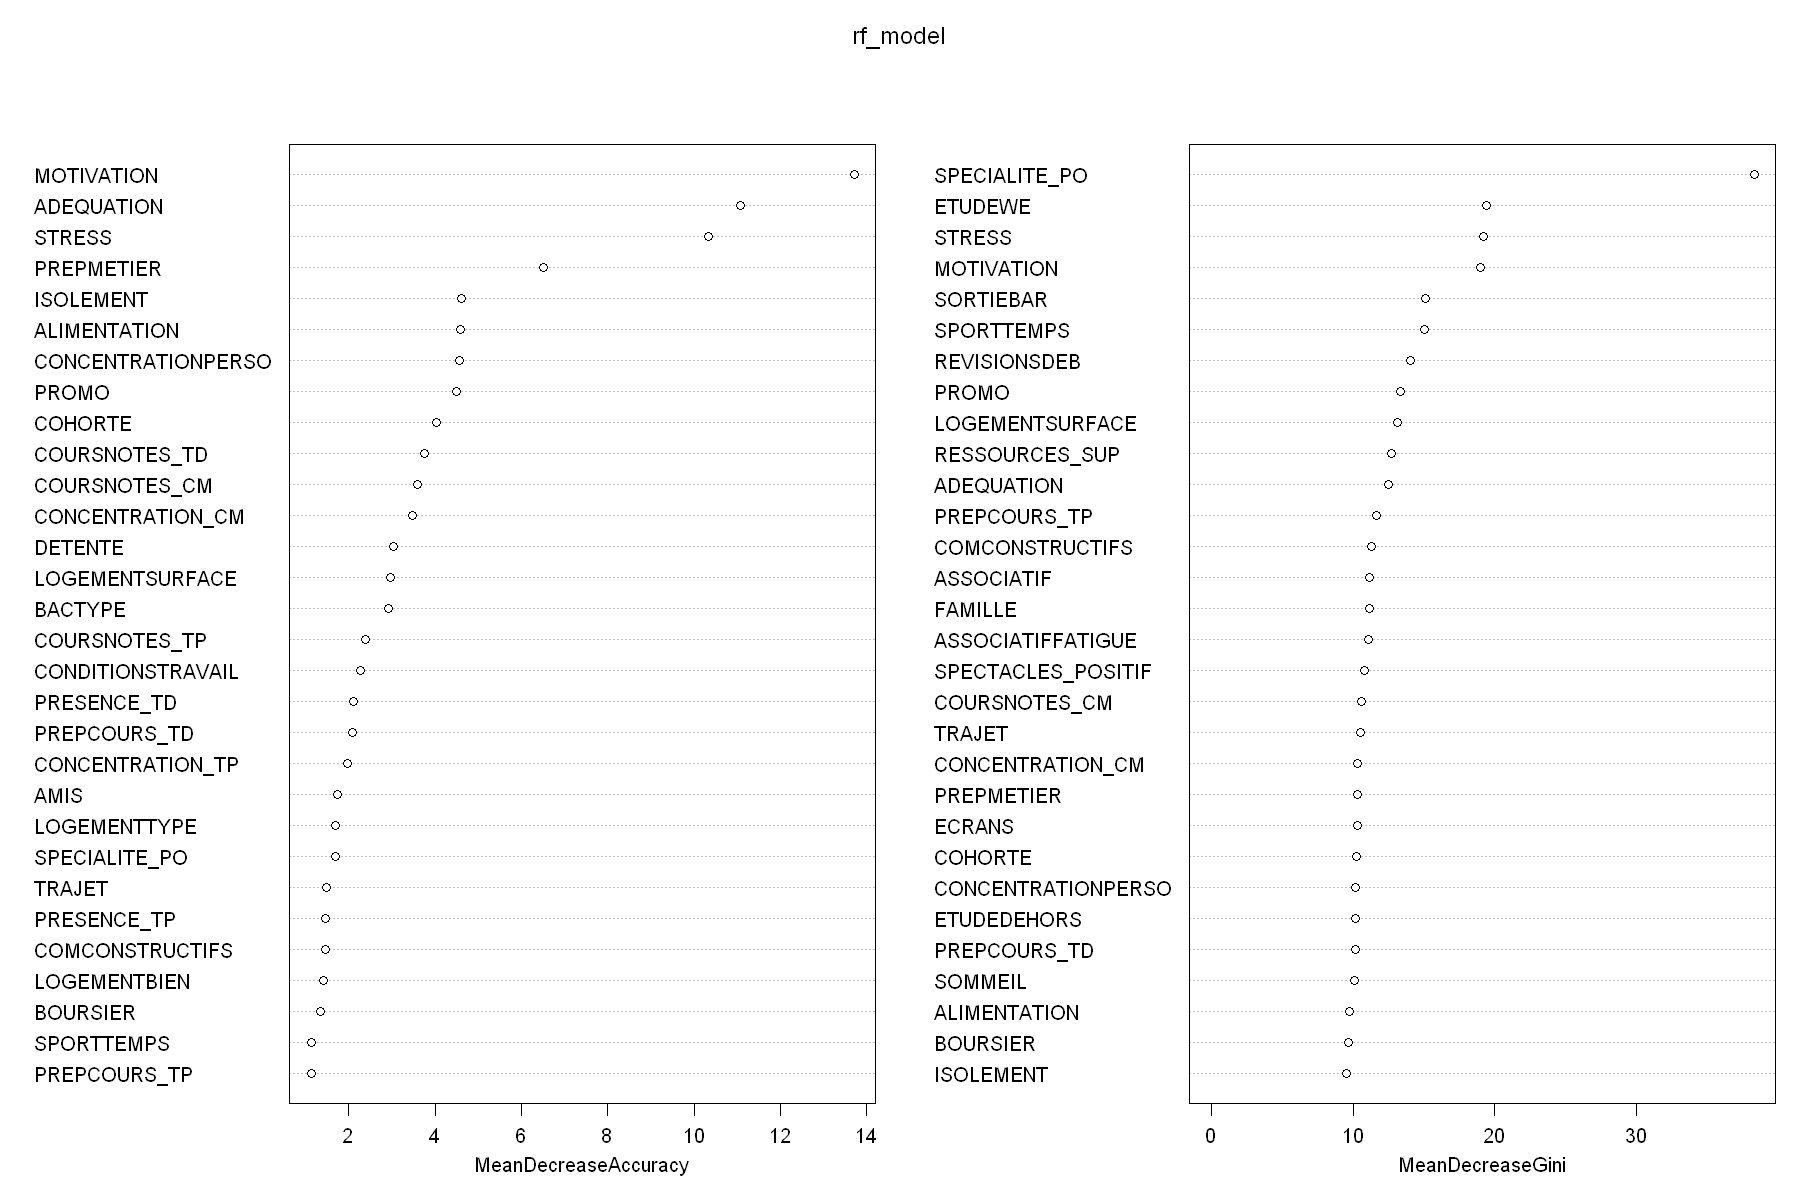

In [124]:
# Afficher l'importance des variables
varImpPlot(rf_model)

MeanDecreaseAccuracy : Indique combien la précision du modèle diminue lorsque cette variable est omise. Plus la valeur est élevée, plus la variable est importante pour le modèle.

MeanDecreaseGini : Indique l'importance de chaque variable dans la réduction de l'impureté (Gini). Plus la valeur est élevée, plus la variable est importante pour séparer les classes.

Les variables telles que MOTIVATION, STRESS, et SPECIALITE sont cruciales pour le modèle, indiquant qu'elles jouent un rôle significatif dans la prédiction de SENSATIONREUSSITE.

In [97]:
# Vérifier la dépendance de MOTIVATION avec SENSATIONREUSSITE
chi_square_test_motivation <- chisq.test(table(insa_cleaned_1$MOTIVATION, insa_cleaned_1$SENSATIONREUSSITE))
print(chi_square_test_motivation)

# Vérifier la dépendance de STRESS avec SENSATIONREUSSITE
chi_square_test_stress <- chisq.test(table(insa_cleaned_1$STRESS, insa_cleaned_1$SENSATIONREUSSITE))
print(chi_square_test_stress)

# Vérifier la dépendance de SPECIALITE avec SENSATIONREUSSITE
chi_square_test_specialite <- chisq.test(table(insa_cleaned_1$SPECIALITE, insa_cleaned_1$SENSATIONREUSSITE))
print(chi_square_test_specialite)

Warning message in chisq.test(table(insa_cleaned_1$MOTIVATION, insa_cleaned_1$SENSATIONREUSSITE)):
"Chi-squared approximation may be incorrect"



	Pearson's Chi-squared test

data:  table(insa_cleaned_1$MOTIVATION, insa_cleaned_1$SENSATIONREUSSITE)
X-squared = 255.22, df = 9, p-value < 2.2e-16



Warning message in chisq.test(table(insa_cleaned_1$STRESS, insa_cleaned_1$SENSATIONREUSSITE)):
"Chi-squared approximation may be incorrect"



	Pearson's Chi-squared test

data:  table(insa_cleaned_1$STRESS, insa_cleaned_1$SENSATIONREUSSITE)
X-squared = 180.71, df = 9, p-value < 2.2e-16



Warning message in chisq.test(table(insa_cleaned_1$SPECIALITE, insa_cleaned_1$SENSATIONREUSSITE)):
"Chi-squared approximation may be incorrect"



	Pearson's Chi-squared test

data:  table(insa_cleaned_1$SPECIALITE, insa_cleaned_1$SENSATIONREUSSITE)
X-squared = 73.587, df = 39, p-value = 0.0006737



**Nous constatons que les valeurs du test du chi-carré (X-squared) pour les tests sont élevées et que les p-valeurs sont bien inférieures à 0,05. Par conséquent, nous pouvons conclure que la variable SENSATIONREUSSITE dépend des variables MOTIVATION, STRESS et SPECIALITE, et que le modèle construit est relativement précis.**

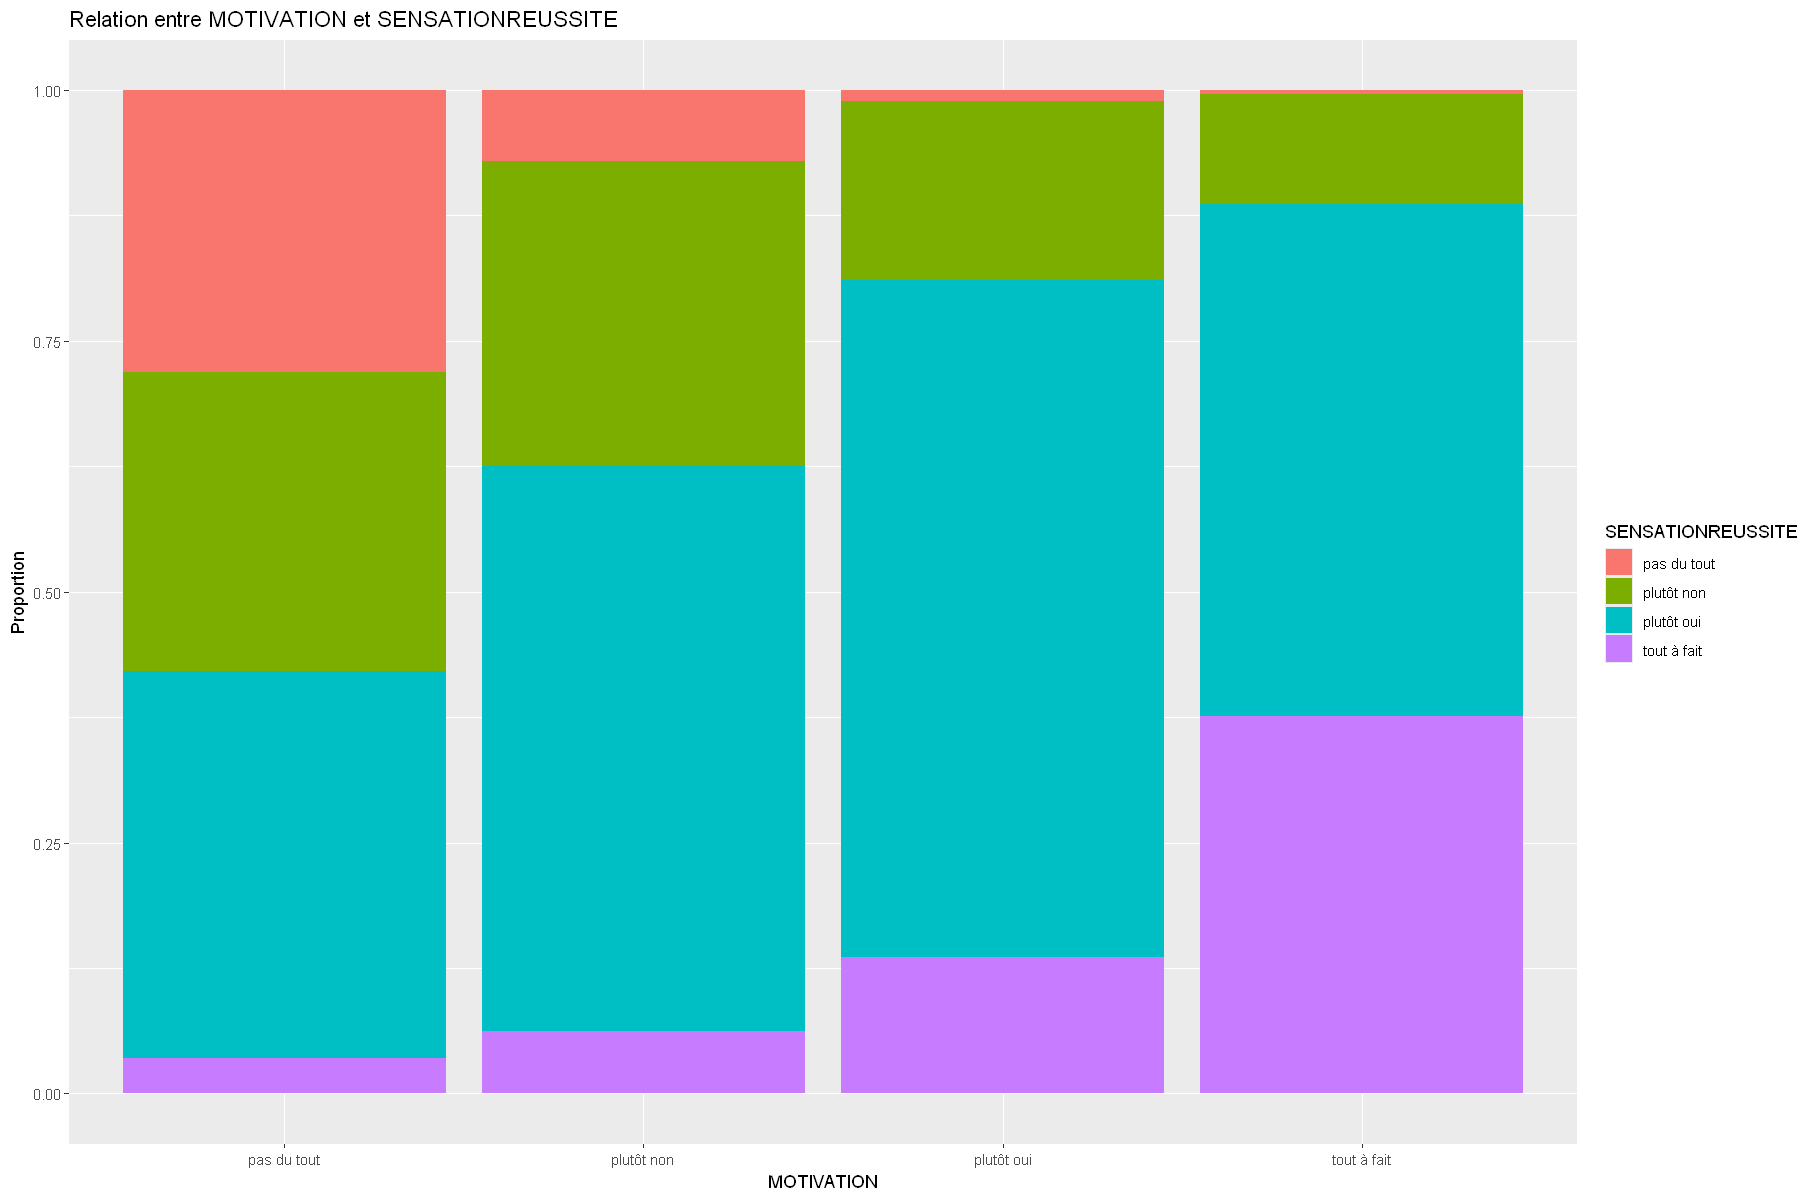

In [125]:
# Graphique de barres empilées pour MOTIVATION et SENSATIONREUSSITE
ggplot(insa_cleaned_3, aes(x = MOTIVATION, fill = SENSATIONREUSSITE)) +
  geom_bar(position = "fill") +
  labs(y = "Proportion", title = "Relation entre MOTIVATION et SENSATIONREUSSITE")

Nous pouvons voir que les étudiants ayant plus de motivation ont tendance à se sentir capables de réussir leurs études à l'INSA. Cela peut s'expliquer par le fait que, s'ils sont motivés, ils feront des efforts dans leurs études, ce qui peut leur permettre d'obtenir de bons résultats et de se sentir capables de réussir à l'INSA. À l'inverse, ceux qui ont une faible motivation ont tendance à se sentir moins capables de réussir leurs études à l'INSA.

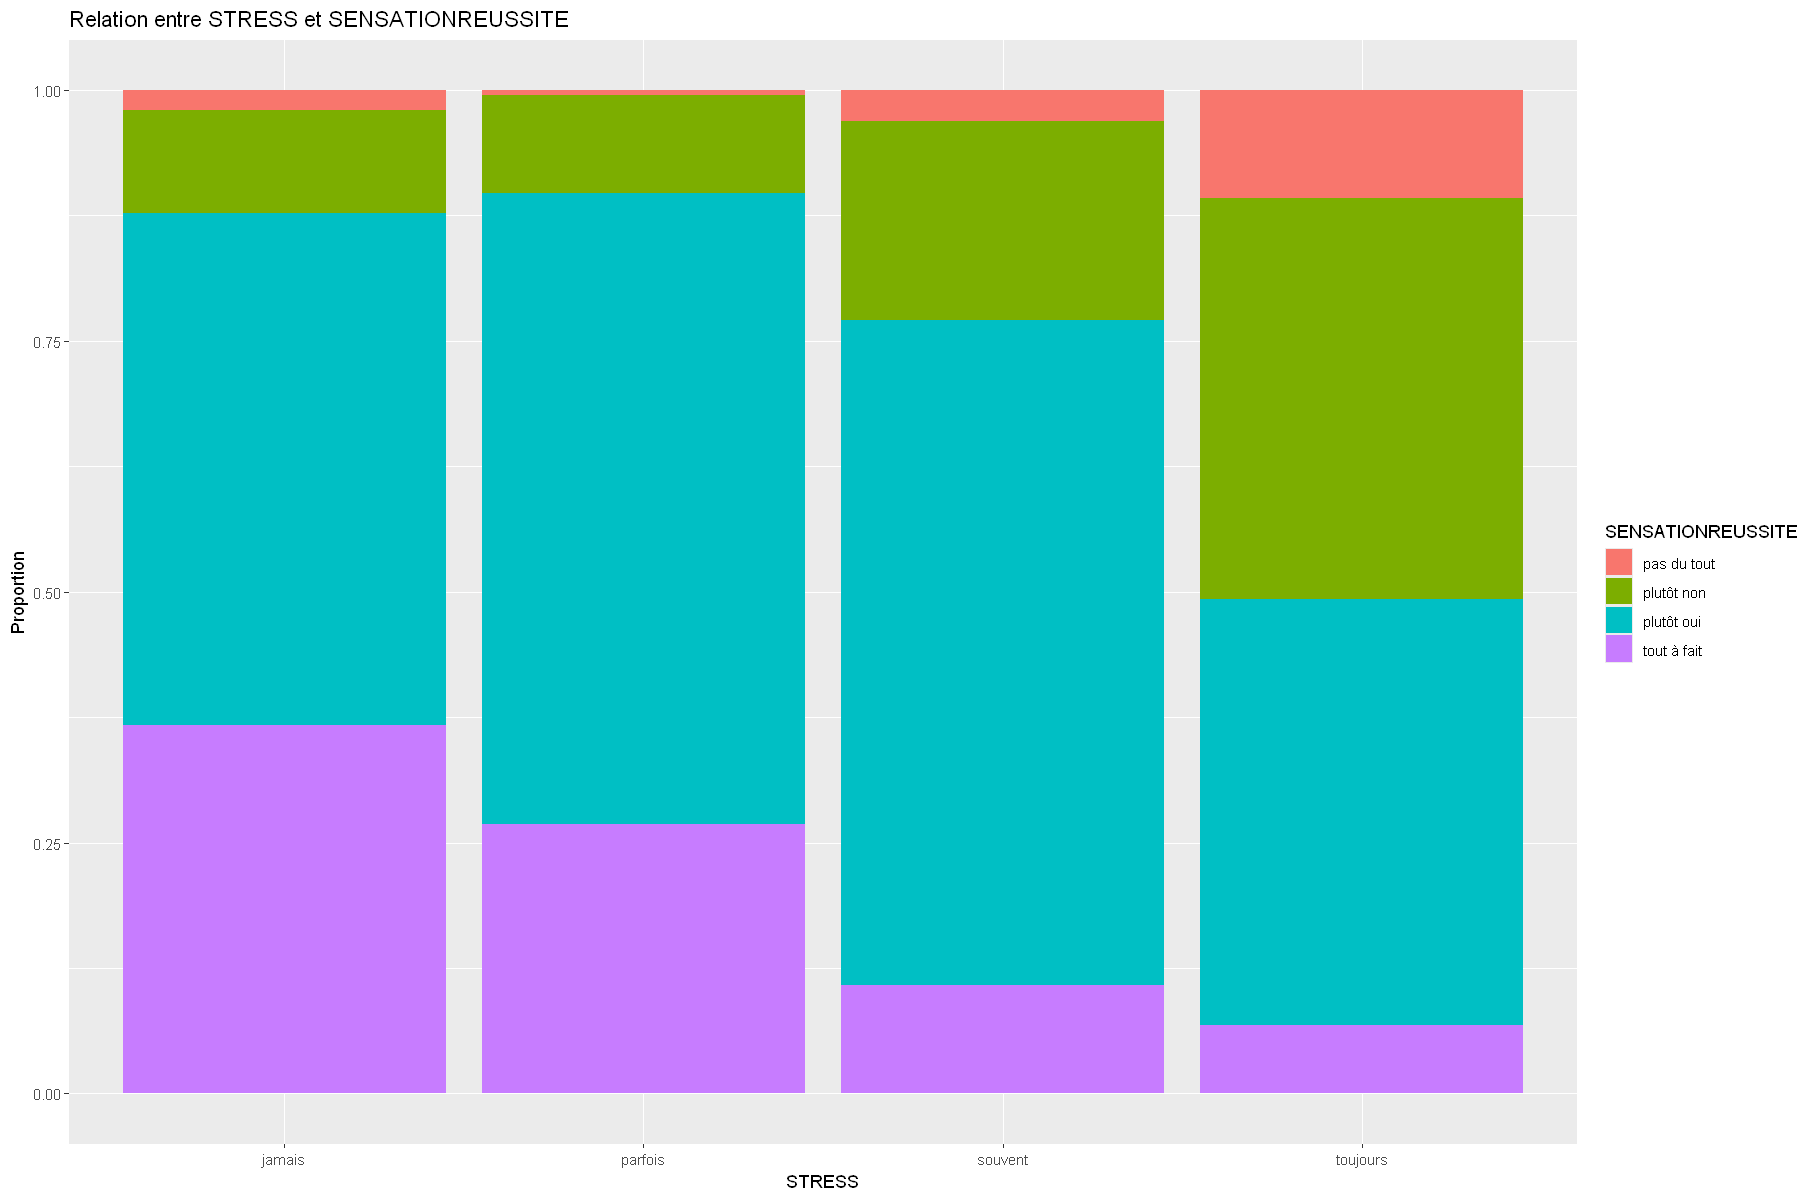

In [126]:
# Graphique de barres empilées pour STRESS et SENSATIONREUSSITE
ggplot(insa_cleaned_3, aes(x = STRESS, fill = SENSATIONREUSSITE)) +
  geom_bar(position = "fill") +
  labs(y = "Proportion", title = "Relation entre STRESS et SENSATIONREUSSITE")

Nous pouvons constater que le stress et le sentiment de pouvoir réussir les études à l’INSA sont inversement proportionnels. Ceux qui sont moins stressés ont tendance à se sentir plus capables de réussir leurs études à l’INSA, tandis que ceux qui sont fréquemment stressés ont un sentiment de réussite plus faible. Par conséquent, il est également nécessaire d'examiner quelles variables influencent le stress des étudiants afin de trouver des moyens de le réduire.

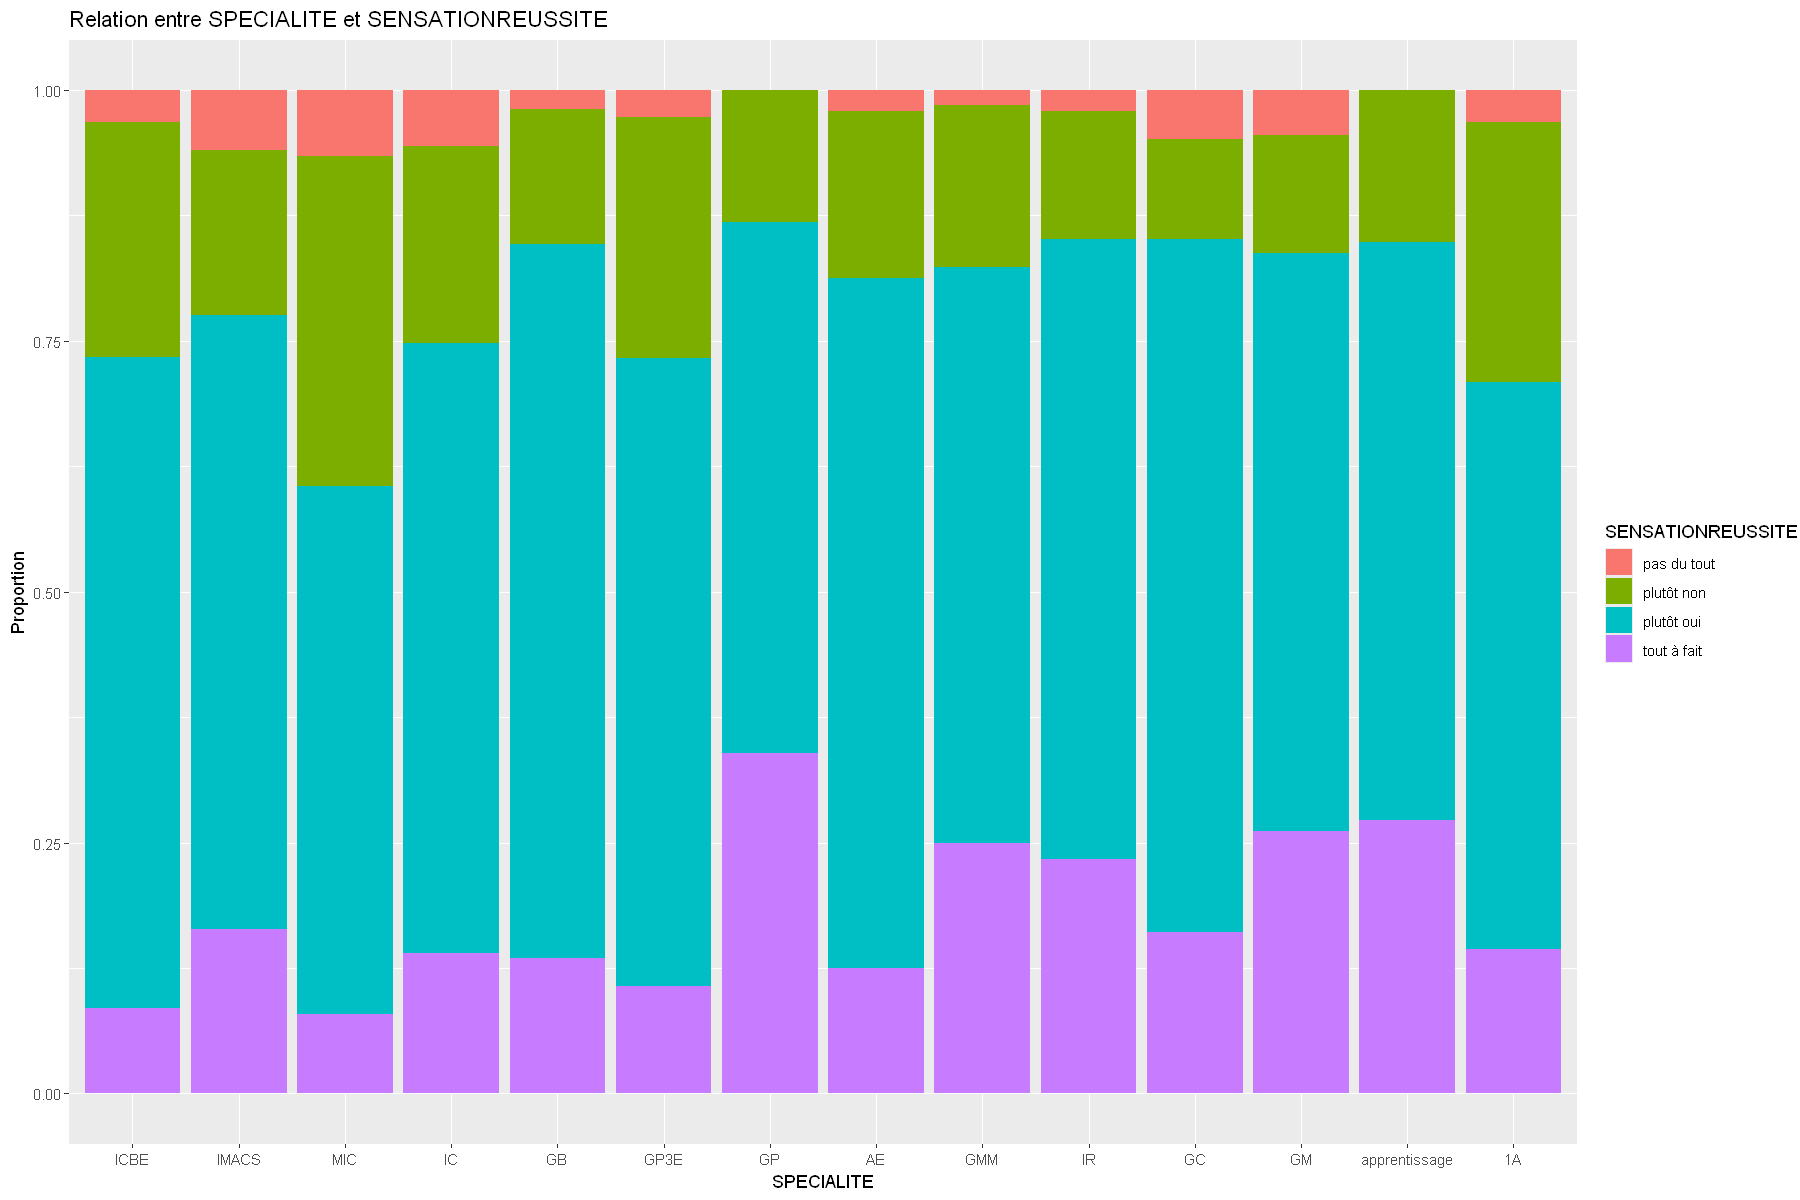

In [106]:
options(repr.plot.width = 15, repr.plot.height = 10)
# Graphique de barres empilées pour SPECIALITE et SENSATIONREUSSITE
ggplot(insa_cleaned_3, aes(x = SPECIALITE, fill = SENSATIONREUSSITE)) +
  geom_bar(position = "fill") +
  labs(y = "Proportion", title = "Relation entre SPECIALITE et SENSATIONREUSSITE")

Nous constatons que les étudiants de la filière MIC sont ceux qui ont le sentiment de réussite à l'INSA le plus faible (environ 40 % des étudiants ressentent plutôt non ou pas du tout). Cela peut s'expliquer par la charge de travail importante en deuxième et troisième années de MIC, qui comprend beaucoup de théories en mathématiques et en physique nécessitant des calculs complexes. Ensuite viennent les filières ICBE, GP3E et 1A. De plus, les groupes d'étudiants qui croient le plus en leur capacité à réussir leurs études à l'INSA sont ceux des filières GP, apprentissage et GC. 
Une observation particulière est que les étudiants de PO MIC se sentent les moins capables de réussir à l'INSA, alors que les étudiants de GMM et IR se sentent relativement confiants quant à leur réussite. Cela est logique, car après avoir surmonté les deux années difficiles de PO, ils se sentent plus assurés.

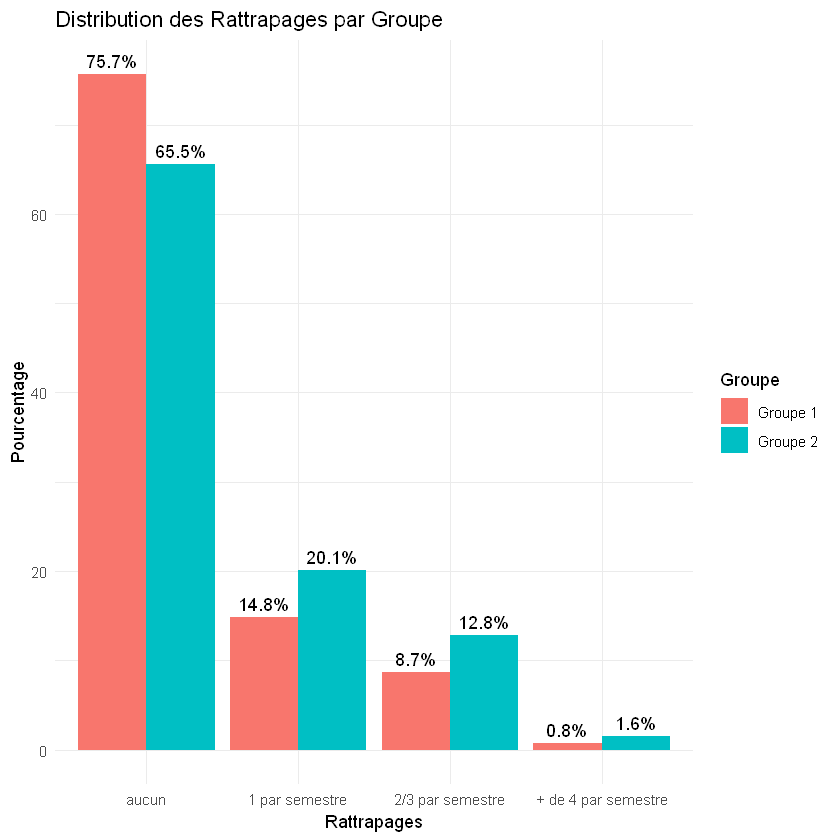

In [14]:
# Convert PROMO and INTEGRATION to character to avoid factor level issues
insa_cleaned_1 <- insa_cleaned_1 %>%
  mutate(PROMO = as.character(PROMO),
         INTEGRATION = as.character(INTEGRATION))
# Créer le Groupe 1 : Etudiants en première année (PROMO = 1A) ou nouveaus entrants (PROMO = INTEGRATION)
group1 <- insa_cleaned_1[insa_cleaned_1$PROMO == '1A' | insa_cleaned_1$PROMO == insa_cleaned_1$INTEGRATION, ]

# Créer le Groupe 2 : Tous les autres
group2 <- insa_cleaned_1[!(insa_cleaned_1$PROMO == '1A' | insa_cleaned_1$PROMO == insa_cleaned_1$INTEGRATION), ]

# Calculer la distribution de 'RATTRAPAGES' pour les deux groupes
group1_distribution <- prop.table(table(group1$RATTRAPAGES)) * 100
group2_distribution <- prop.table(table(group2$RATTRAPAGES)) * 100

# Convertir les distributions en data frames pour les graphiques
group1_df <- as.data.frame(group1_distribution)
group2_df <- as.data.frame(group2_distribution)
group1_df$Group <- 'Groupe 1'
group2_df$Group <- 'Groupe 2'

# Renommer les colonnes pour plus de clarté
colnames(group1_df) <- c("RATTRAPAGES", "Pourcentage", "Groupe")
colnames(group2_df) <- c("RATTRAPAGES", "Pourcentage", "Groupe")

# Combiner les data frames
combined_df <- rbind(group1_df, group2_df)

# Afficher les distributions en utilisant ggplot2
ggplot(combined_df, aes(x = RATTRAPAGES, y = Pourcentage, fill = Groupe)) +
  geom_bar(stat = 'identity', position = 'dodge') +
  geom_text(aes(label = sprintf("%.1f%%", Pourcentage)), 
            position = position_dodge(width = 0.9), vjust = -0.5) +
  labs(title = 'Distribution des Rattrapages par Groupe',
       x = 'Rattrapages',
       y = 'Pourcentage') +
  theme_minimal()

In [15]:
# Convert PROMO and INTEGRATION to character to avoid factor level issues
insa_cleaned_1 <- insa_cleaned_1 %>%
  mutate(PROMO = as.character(PROMO),
         INTEGRATION = as.character(INTEGRATION))

# Créer le Groupe 1 : PROMO = 1A ou PROMO = INTEGRATION
group1 <- insa_cleaned_1 %>%
  filter(PROMO == '1A' | PROMO == INTEGRATION)

# Créer le Groupe 2 : Tous les autres
group2 <- insa_cleaned_1 %>%
  filter(!(PROMO == '1A' | PROMO == INTEGRATION))

# Afficher les premières lignes des deux dataframes pour vérification
head(group1)
head(group2)

write_xlsx(group1, "group1.xlsx")
write_xlsx(group2, "group2.xlsx")

TRAJET,LOGEMENTTYPE,LOGEMENTSURFACE,LOGEMENTBIEN,ACT_PRO,BOURSIER,HANDICAP,TIERSTEMPS,STRESS,COMMENTAIRE,⋯,PROMO,SPECIALITE,COHORTE,DOUBLEDIPLOME,INTEGRATION,BACTYPE,CLASSEMENT1A,CLASSEMENTDERNIER,REDOUBLEMENT,RATTRAPAGES
<fct>,<fct>,<fct>,<fct>,<fct>,<fct>,<fct>,<fct>,<fct>,<fct>,⋯,<chr>,<fct>,<fct>,<fct>,<chr>,<fct>,<fct>,<fct>,<fct>,<fct>
15-30min,seul,20-30m2,tout à fait,aucune,non,non,Non,toujours,parfois,⋯,3A,GB,classique,non,3A,Fr,pas de classement,jsp,Non,aucun
5-15min,colocation,coloc ou foyer familial,tout à fait,oui 1-5h,non,non,Non,souvent,parfois,⋯,3A,GB,SHN,non,3A,Fr,pas de classement,10-25%,Non,2/3 par semestre
5-15min,seul,20-30m2,plutôt oui,aucune,echelon 1-3,non,Non,toujours,parfois,⋯,3A,ICBE,classique,non,3A,Fr,pas de classement,jsp,Non,aucun
5-15min,seul,20-30m2,plutôt oui,aucune,non,non,Non,toujours,parfois,⋯,3A,ICBE,classique,non,3A,Fr,pas de classement,jsp,Non,aucun
15-30min,seul,20-30m2,tout à fait,aucune,non,non,Non,parfois,jamais,⋯,3A,ICBE,classique,non,3A,Fr,pas de classement,jsp,Non,aucun
5-15min,seul,20-30m2,tout à fait,aucune,non,non,Non,parfois,jamais,⋯,3A,GB,classique,non,3A,Fr,pas de classement,75-100%,Oui,1 par semestre


TRAJET,LOGEMENTTYPE,LOGEMENTSURFACE,LOGEMENTBIEN,ACT_PRO,BOURSIER,HANDICAP,TIERSTEMPS,STRESS,COMMENTAIRE,⋯,PROMO,SPECIALITE,COHORTE,DOUBLEDIPLOME,INTEGRATION,BACTYPE,CLASSEMENT1A,CLASSEMENTDERNIER,REDOUBLEMENT,RATTRAPAGES
<fct>,<fct>,<fct>,<fct>,<fct>,<fct>,<fct>,<fct>,<fct>,<fct>,⋯,<chr>,<fct>,<fct>,<fct>,<chr>,<fct>,<fct>,<fct>,<fct>,<fct>
15-30min,seul,+ 30m2,tout à fait,aucune,echelon 1-3,non,Non,souvent,jamais,⋯,4A,GMM,classique,non,3A,Fr,pas de classement,25-50%,Non,aucun
5-15min,seul,+ 30m2,tout à fait,aucune,non,non,Non,souvent,parfois,⋯,4A,GMM,classique,oui,post-bac,Fr,0-10%,0-10%,Non,aucun
0-5min,seul,10-20m2,plutôt oui,aucune,non,non,Non,souvent,parfois,⋯,4A,GMM,classique,non,1A,Fr,50-75%,25-50%,Non,aucun
5-15min,seul,+ 30m2,tout à fait,aucune,non,non,Non,toujours,parfois,⋯,4A,GB,classique,non,post-bac,Fr,25-50%,10-25%,Non,aucun
5-15min,colocation,coloc ou foyer familial,tout à fait,aucune,non,non,Oui,souvent,parfois,⋯,4A,GB,classique,non,3A,Fr,pas de classement,50-75%,Oui,1 par semestre
5-15min,colocation,coloc ou foyer familial,tout à fait,oui 1-5h,non,non,Non,toujours,parfois,⋯,4A,GB,classique,non,post-bac,Fr,50-75%,jsp,Oui,2/3 par semestre


In [16]:
# Obtenir la liste des variables à partir des noms des colonnes de group1
variables_to_plot <- names(group1)

# Créer une liste pour stocker les graphiques
plots <- list()

# Générer les graphiques pour chaque variable et les ajouter à la liste
for (var in variables_to_plot) {
  plots[[var]] <- plot_distribution(group1, var)
}

# Définir le nombre de colonnes et calculer le nombre de lignes nécessaires
ncol <- 4
nrow <- ceiling(length(plots) / ncol)

# Enregistrer les graphiques dans un fichier PDF
pdf("distributions_group_1.pdf", width = 16, height = nrow * 7)  # Ajustez la largeur et la hauteur selon vos besoins
grid.arrange(grobs = lapply(plots, ggplotGrob), ncol = ncol)
dev.off()

png 
  2

In [17]:
# Obtenir la liste des variables à partir des noms des colonnes de group2
variables_to_plot <- names(group2)

# Créer une liste pour stocker les graphiques
plots <- list()

# Générer les graphiques pour chaque variable et les ajouter à la liste
for (var in variables_to_plot) {
  plots[[var]] <- plot_distribution(group2, var)
}

# Définir le nombre de colonnes et calculer le nombre de lignes nécessaires
ncol <- 4
nrow <- ceiling(length(plots) / ncol)

# Enregistrer les graphiques dans un fichier PDF
pdf("distributions_group_2.pdf", width = 16, height = nrow * 7)  # Ajustez la largeur et la hauteur selon vos besoins
grid.arrange(grobs = lapply(plots, ggplotGrob), ncol = ncol)
dev.off()

png 
  2

In [17]:
# Créer une table de contingence pour LOGEMENTTYPE et RATTRAPAGES
contingency_table <- table(insa_cleaned_1$LOGEMENTTYPE, insa_cleaned_1$RATTRAPAGES)

# Afficher la table de contingence
print(contingency_table)


                
                 aucun 1 par semestre 2/3 par semestre + de 4 par semestre
  seul             611            158               99                  12
  colocation       147             40               26                   1
  foyer familial    44             15                8                   2


In [18]:
# Réaliser le test du Chi-Square
chi_square_test <- chisq.test(contingency_table)

# Afficher les résultats du test
print(chi_square_test)


Warning message in chisq.test(contingency_table):
“L’approximation du Chi-2 est peut-être incorrecte”



	Pearson's Chi-squared test

data:  contingency_table
X-squared = 3.4887, df = 6, p-value = 0.7455



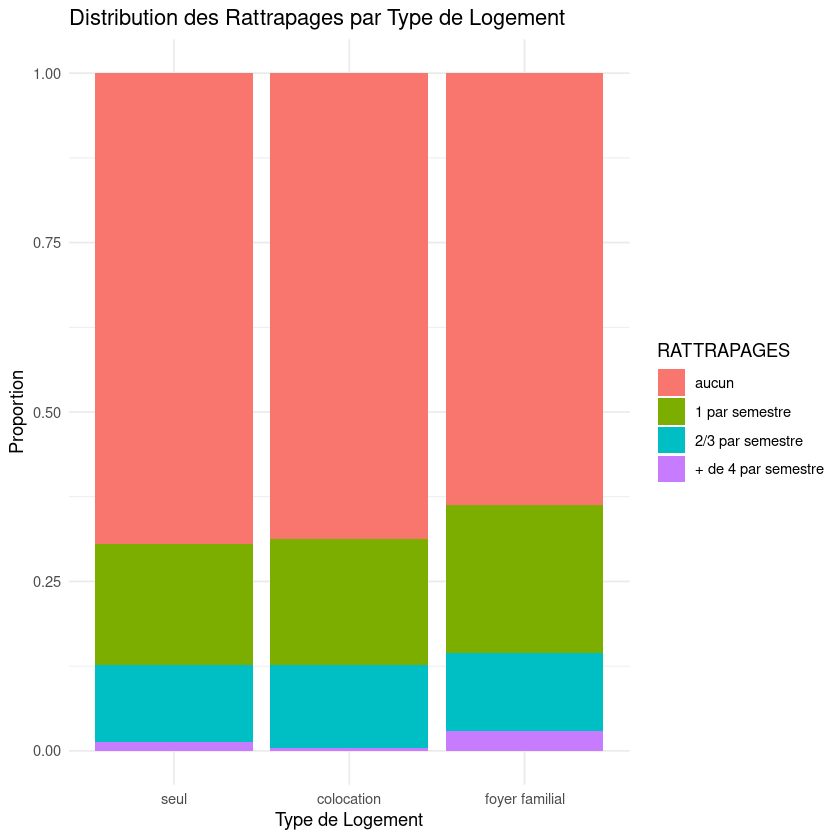

In [19]:
# Visualiser la distribution des RATTRAPAGES par LOGEMENTTYPE
ggplot(insa_cleaned_1, aes(x = LOGEMENTTYPE, fill = RATTRAPAGES)) +
  geom_bar(position = 'fill') +
  labs(title = 'Distribution des Rattrapages par Type de Logement',
       x = 'Type de Logement',
       y = 'Proportion') +
  theme_minimal()


    Cependant, je vois un autre problème ici : nous avons des modalités avec des fréquences d'apparition très faibles, par exemple pour les variables LOGEMENTBIEN, ACT_PRO(TRAVAILTEMPS), COMCONSTRUCTIFS(NON), PRESENCE_TD,... Cela rend les estimations des paramètres de ces modalités très instables, entraînant du bruit et un surajustement du modèle. Par conséquent, la mise en commun augmente le nombre d'observations par groupe, aidant ainsi le modèle à apprendre des modèles de manière plus cohérente. De plus, regrouper les variables avec une fréquence faible mais des significations similaires aide à réduire la complexité du modèle, car chaque modalité dans une variable catégorielle crée une nouvelle dimension spatiale lorsqu’elle est codée à l’aide de la méthode de codage one-hot, entraînant une augmentation du nombre de paramètres à apprendre et un risque accru de surajustement.
    Par exemple, si nous avons seulement un étudiant qui choisit SORTIEBAR_tous les jours, et que cet étudiant redouble, nous risquons un surajustement car les variables REDOUBLEMENT et SORTIEBAR_tous les jours seraient complètement corrélées.

    Après avoir combiné les modalités à faible fréquence et de signification similaire, nos données seront entièrement propres et prêtes pour la construction du modèle.

 Le choix du modèle pour l'analyse, nous allons utiliser la méthode Random Forest, car elle n'est pas affectée par la dépendance entre les variables. 